# **Importing the required Libraries**

In [1]:
pip install snscrape

In [2]:
pip install text2emotion

     |████████████████████████████████| 57 kB 2.9 MB/s 
     |████████████████████████████████| 175 kB 9.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d108e9bfdcb6f77c80b1da30f9005ecd79e17c51638e09ee139d5ccb3bf9c527
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [355]:
# to import the tweets data
import tweepy

# imporitng the convertor
from sklearn.feature_extraction.text import CountVectorizer

# importing tabular data and matrices handlers
import pandas as pd
import numpy as np

import snscrape.modules.twitter as sntwitter

# importing for calculations
from numpy import mean
from numpy import std

#importing to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#importing for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#importing classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#importing visualization packages
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#text to emotion 
import text2emotion as te

#for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 100,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

# **Authentication**

In [4]:
# credentials for authenticating tweepy api
c_key = 'dwIn63JhuWvpbwrzQp6NQkwBA'
c_secret = 'N2pEAKyJmuSYsKkcJURWPXfun8Yrrwkwc65z5SNjR6QTEanxQd'
a_token = '1301245220416188416-VIFTWc6Z1u70myjfDtkIcZltArZ8Bp'
a_token_secret = 'DTdHuH33ke6Bvd8OVAzNV7b3ffegfdwXgnhrWCsIYVAsf'

In [5]:
# authenticating tweepy api
auth= tweepy.OAuthHandler(c_key,c_secret)
auth.set_access_token(a_token,a_token_secret)

In [6]:
api = tweepy.API(auth)

# **Loading the data**

In [7]:
def load_tweets():
  """
  Function to load the tweets using scraping
  """
  tweets_list = []
  for itr,tw in enumerate(sntwitter.TwitterSearchScraper('#COVID since:2019-01-01 until:2022-03-27 lang:en').get_items()):
      if itr>5000:
          break
      tweets_list.append([tw.date, tw.id, tw.content])
  return tweets_list

In [8]:
# loading tweets, other data and creating its dataframe
tweets_list=load_tweets()
dataframe = pd.DataFrame(tweets_list , columns=['Date_Time', 'Tweet_Id', 'Text'])
dataframe.head()

,Date_Time,Tweet_Id,Text
0,2022-03-26 23:58:22+00:00,1507869603145429003,REAL PEOPLE ARE REALLY DYING FROM #COVID BECAU...
1,2022-03-26 23:58:13+00:00,1507869564276719621,"The #WorldHealthOrganisation (#WHO) has a ""rul..."
2,2022-03-26 23:57:48+00:00,1507869456881655811,This and that this government believes #Covid_...
3,2022-03-26 23:56:14+00:00,1507869063804260359,If you weren't mandated into getting vaccinate...
4,2022-03-26 23:56:10+00:00,1507869047249059856,@RonFilipkowski @therealtoofine Coughing up a ...


In [9]:
# saving initial data to csv file
dataframe.to_csv('initial_data.csv', encoding='utf-8')

In [10]:
# indexing the tweets
lists=[]
for _ in range(5000):
	lists.append(_)

In [11]:
tweets_data = dataframe.loc[dataframe.index[lists]]

In [12]:
tweets_data

,Date_Time,Tweet_Id,Text
0,2022-03-26 23:58:22+00:00,1507869603145429003,REAL PEOPLE ARE REALLY DYING FROM #COVID BECAU...
1,2022-03-26 23:58:13+00:00,1507869564276719621,"The #WorldHealthOrganisation (#WHO) has a ""rul..."
2,2022-03-26 23:57:48+00:00,1507869456881655811,This and that this government believes #Covid_...
3,2022-03-26 23:56:14+00:00,1507869063804260359,If you weren't mandated into getting vaccinate...
4,2022-03-26 23:56:10+00:00,1507869047249059856,@RonFilipkowski @therealtoofine Coughing up a ...
...,...,...,...
4995,2022-03-24 23:12:43+00:00,1507133336539566082,@alecgrrr @heather_1562 @Independent Enjoy you...
4996,2022-03-24 23:12:39+00:00,1507133320081321986,Covid is in the house! Very mild at the moment...
4997,2022-03-24 23:12:11+00:00,1507133202674159619,An ICU in Ontario only has 50% of required nur...
4998,2022-03-24 23:11:50+00:00,1507133115105685506,I’m grateful to be triple vaccinated as ##COVI...


# **Data Cleaning & Preprocessing**

In [13]:
# removing URL, special characters, extra spaces, etc
tweets_data["Text"]=tweets_data.Text.str.replace(r'^b','') 
tweets_data["Text"]=tweets_data.Text.str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', '') 
tweets_data["Text"]=tweets_data.Text.str.replace(r'@[a-zA-Z0-9]{1,10}', '') 

tweets_data["Text"]=tweets_data.Text.str.replace(r'\$[a-zA-Z0-9]*', '')
tweets_data["Text"]=tweets_data.Text.str.replace(r'[0-9]*','')

tweets_data["Text"]=tweets_data.Text.str.replace(r'\\[a-z A-Z]{1,2}','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\:','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\\n','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\#','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\/','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\'','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\"','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\-','')

tweets_data["Text"]=tweets_data.Text.str.replace(r'\?','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\_','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'%','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\,','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'.','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\&amp','')

tweets_data["Text"]=tweets_data.Text.str.replace(r';','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'!','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\\s','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\)','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\(','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\+','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\=','')

tweets_data['Text'] = tweets_data['Text'].str.strip().str.lower()

In [14]:
tweets_data

,Date_Time,Tweet_Id,Text
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...
...,...,...,...
4995,2022-03-24 23:12:43+00:00,1507133336539566082,t enjoy your ignorance\n\nvaccinated account f...
4996,2022-03-24 23:12:39+00:00,1507133320081321986,covid is in the house very mild at the moment ...
4997,2022-03-24 23:12:11+00:00,1507133202674159619,an icu in ontario only has of required nurses...
4998,2022-03-24 23:11:50+00:00,1507133115105685506,i’m grateful to be triple vaccinated as covid ...


# **Analyzing Sentiment Intensity**

In [15]:
# downloading vader_lexicon tool and initializing the sentiment analyzer
nltk.download("vader_lexicon")
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [16]:
# assigning polarities according to the text in tweets
tweets_data["Positive"] = [sentiment_analyzer.polarity_scores(itr)["pos"] for itr in tweets_data["Text"]]
tweets_data["Negative"] = [sentiment_analyzer.polarity_scores(itr)["neg"] for itr in tweets_data["Text"]]
tweets_data["Neutral"] = [sentiment_analyzer.polarity_scores(itr)["neu"] for itr in tweets_data["Text"]]
tweets_data['Compound'] = [sentiment_analyzer.polarity_scores(itr)["compound"] for itr in tweets_data["Text"]]

In [17]:
tweets_data.head()

,Date_Time,Tweet_Id,Text,Positive,Negative,Neutral,Compound
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...,0.000,0.220,0.780,-0.4767
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...,0.000,0.000,1.000,0.0000
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...,0.000,0.056,0.944,-0.2960
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...,0.133,0.000,0.867,0.3182
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...,0.078,0.096,0.826,-0.1027


In [18]:
compound_values = tweets_data["Compound"].values

In [19]:
# setting sentiments according to the compound polarity
sentiment_list=[]
for i in compound_values:
    if i >= 0.05 :
        sentiment_list.append('Positive')
    elif i <= -0.05 :
        sentiment_list.append('Negative')
    else:
        sentiment_list.append('Neutral')

In [20]:
# getting unique values of sentiments
list_set = set(sentiment_list)
sentiment_list_unique = (list(list_set))

In [21]:
# adding the sentiments to our initial dataframe
tweets_data["Sentiment"] = sentiment_list
tweets_data.head()

,Date_Time,Tweet_Id,Text,Positive,Negative,Neutral,Compound,Sentiment
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...,0.000,0.220,0.780,-0.4767,Negative
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...,0.000,0.000,1.000,0.0000,Neutral
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...,0.000,0.056,0.944,-0.2960,Negative
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...,0.133,0.000,0.867,0.3182,Positive
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...,0.078,0.096,0.826,-0.1027,Negative


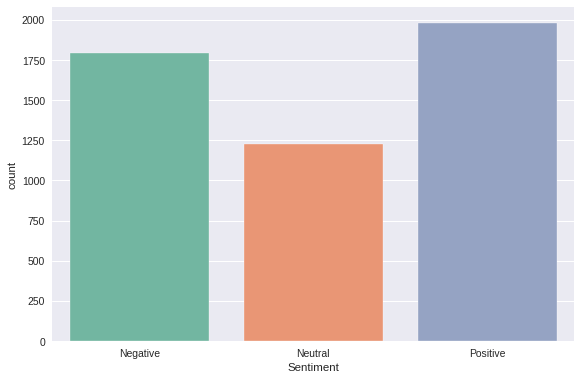

In [22]:
# visualizing the count of each sentiment
plt.style.use("seaborn")
fig, axes = plt.subplots()
bp = sns.countplot(x="Sentiment", data=tweets_data, palette="Set2")
plt.show()

# **Splitting the Sentiment data**

In [23]:
# splitting the dataframe in training and testing subsets
training_data = tweets_data.iloc[:4000,:]
testing_data = tweets_data.iloc[4000:5000,:]

In [24]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date_Time  4000 non-null   datetime64[ns, UTC]
 1   Tweet_Id   4000 non-null   int64              
 2   Text       4000 non-null   object             
 3   Positive   4000 non-null   float64            
 4   Negative   4000 non-null   float64            
 5   Neutral    4000 non-null   float64            
 6   Compound   4000 non-null   float64            
 7   Sentiment  4000 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 281.2+ KB


In [25]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4000 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date_Time  1000 non-null   datetime64[ns, UTC]
 1   Tweet_Id   1000 non-null   int64              
 2   Text       1000 non-null   object             
 3   Positive   1000 non-null   float64            
 4   Negative   1000 non-null   float64            
 5   Neutral    1000 non-null   float64            
 6   Compound   1000 non-null   float64            
 7   Sentiment  1000 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 70.3+ KB


In [26]:
training_data.head()

,Date_Time,Tweet_Id,Text,Positive,Negative,Neutral,Compound,Sentiment
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...,0.000,0.220,0.780,-0.4767,Negative
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...,0.000,0.000,1.000,0.0000,Neutral
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...,0.000,0.056,0.944,-0.2960,Negative
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...,0.133,0.000,0.867,0.3182,Positive
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...,0.078,0.096,0.826,-0.1027,Negative


In [27]:
testing_data.head()

,Date_Time,Tweet_Id,Text,Positive,Negative,Neutral,Compound,Sentiment
4000,2022-03-25 10:37:43+00:00,1507305725277659167,omat life is tough enough without this sort of...,0.000,0.077,0.923,-0.1280,Negative
4001,2022-03-25 10:36:58+00:00,1507305535649230848,interesting read on shifting perspectives towa...,0.130,0.000,0.870,0.4019,Positive
4002,2022-03-25 10:36:11+00:00,1507305335509430274,most antipf antibodies in covid vaccineinduced...,0.180,0.000,0.820,0.2960,Positive
4003,2022-03-25 10:35:01+00:00,1507305043523153924,what research supports changing the definition...,0.122,0.000,0.878,0.3612,Positive
4004,2022-03-25 10:34:40+00:00,1507304956403015682,thanks to all parents and children who have be...,0.146,0.000,0.854,0.4404,Positive


In [28]:
# splitting the training subset
X_train = training_data["Text"]
y_train = training_data["Sentiment"]

In [29]:
# splitting the testing subset
X_test = testing_data["Text"]
y_test = testing_data["Sentiment"]

# **Vectorization**

In [30]:
# initializing the vectorizer and applying it on the tweets
count_vectorizer = CountVectorizer(stop_words='english')
X_train_vector = count_vectorizer.fit_transform(X_train)
X_test_vector = count_vectorizer.transform(X_test)

# **Classification on Sentiments Data**

In [462]:
# creating lists for storing classifiers accuracy
clf_name=[]
clf_accuracy=[]
clf_train_accuracy=[]

In [463]:
# initializing lists to track performance metrics
precision_score = []
recall_score = []
f1_score = []

## **Decision Tree Classifier**

### **Training**

In [464]:
# initializing and fitting the Decision tree classifier
clf_dt = DecisionTreeClassifier(criterion="gini" ,max_depth=20, min_samples_leaf=10)   
clf_dt.fit(X_train_vector, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)

### **Evaluation**

In [465]:
# calculating mean accuracy for Decision Tree classifier
dt_train_prediction = clf_dt.predict(X_train_vector)
dt_train_accuracy = accuracy_score(y_train, dt_train_prediction)
print("Training Accuracy for Decision Tree:",dt_train_accuracy*100)
clf_train_accuracy.append(dt_train_accuracy)

score_dt=clf_dt.score(X_test_vector, y_test)
print("Score for Decision Tree Classifier is:",score_dt*100)
clf_accuracy.append(score_dt)

Training Accuracy for Decision Tree: 48.125
Score for Decision Tree Classifier is: 47.099999999999994


In [466]:
# calculating the prediction
prediction_dt = clf_dt.predict(X_test_vector)

In [467]:
# creating the confusion matrix
dt_conf_matrix = confusion_matrix(y_test, prediction_dt)
dt_conf_matrix

array([[316,   3,  31],
       [223,  10,   4],
       [267,   1, 145]])

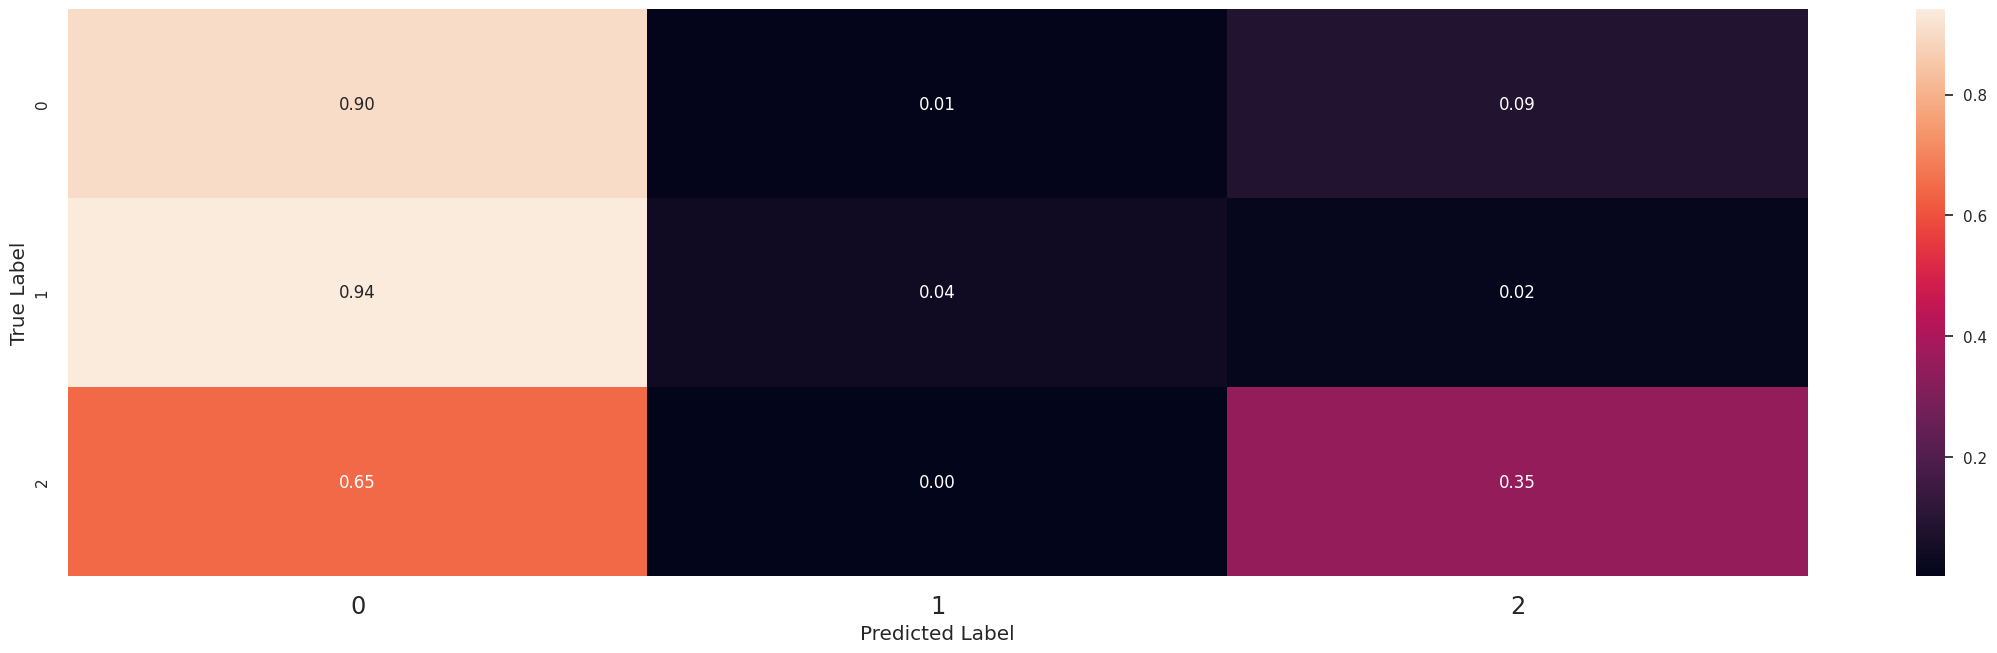

In [468]:
# normalising and viewing the confusion matrix
dt_conf_matrix_norm = dt_conf_matrix.astype('float') / dt_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(dt_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [469]:
# calculating the metrics for prediction
dt_metrics = metrics.classification_report(y_test,prediction_dt,target_names=sentiment_list_unique)
print(dt_metrics)

              precision    recall  f1-score   support

    Negative       0.39      0.90      0.55       350
    Positive       0.71      0.04      0.08       237
     Neutral       0.81      0.35      0.49       413

    accuracy                           0.47      1000
   macro avg       0.64      0.43      0.37      1000
weighted avg       0.64      0.47      0.41      1000



### **Tuning Hyperparameters**

#### **Grid Search Cross Validation**

In [470]:

# initializing Grid Search Cross Validation for hyperparameter tuning
criterion_list=['gini','entropy']
min_samples_split_list_dt=[2,5,10]
dt_parameters_dict = dict(criterion=criterion_list,min_samples_split=min_samples_split_list_dt)
dt_grid = GridSearchCV(clf_dt, dt_parameters_dict, cv=5, scoring='accuracy')
dt_grid.fit(X_train_vector, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=20,
                                              min_samples_leaf=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [471]:
# viewing the best parameters
print(dt_grid.best_params_)

{'criterion': 'entropy', 'min_samples_split': 5}


##### **Retraining**

In [472]:
# reinitializing and refitting the KNN Classifier
dt_ht_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
dt_ht_clf.fit(X_train_vector,y_train)

DecisionTreeClassifier()

##### **Revaluation**

In [473]:
# recalculating training accuracy
dt_ht_train_prediction = dt_ht_clf.predict(X_train_vector)
dt_ht_train_accuracy = accuracy_score(y_train,dt_ht_train_prediction)
print("Training Accuracy with tuned Hyperparameters:",dt_ht_train_accuracy*100)
clf_train_accuracy.append(dt_ht_train_accuracy)

# recalculating testing accuracy
dt_ht_test_prediction = dt_ht_clf.predict(X_test_vector)
dt_ht_test_accuracy = accuracy_score(y_test, dt_ht_test_prediction)
print("Testing Accuracy with tuned Hyperparameters:",dt_ht_test_accuracy*100)
clf_accuracy.append(dt_ht_test_accuracy)

Training Accuracy with tuned Hyperparameters: 99.97500000000001
Testing Accuracy with tuned Hyperparameters: 60.4


In [474]:
# creating the confusion matrix
dt_ht_conf_matrix = confusion_matrix(y_test, dt_ht_test_prediction)

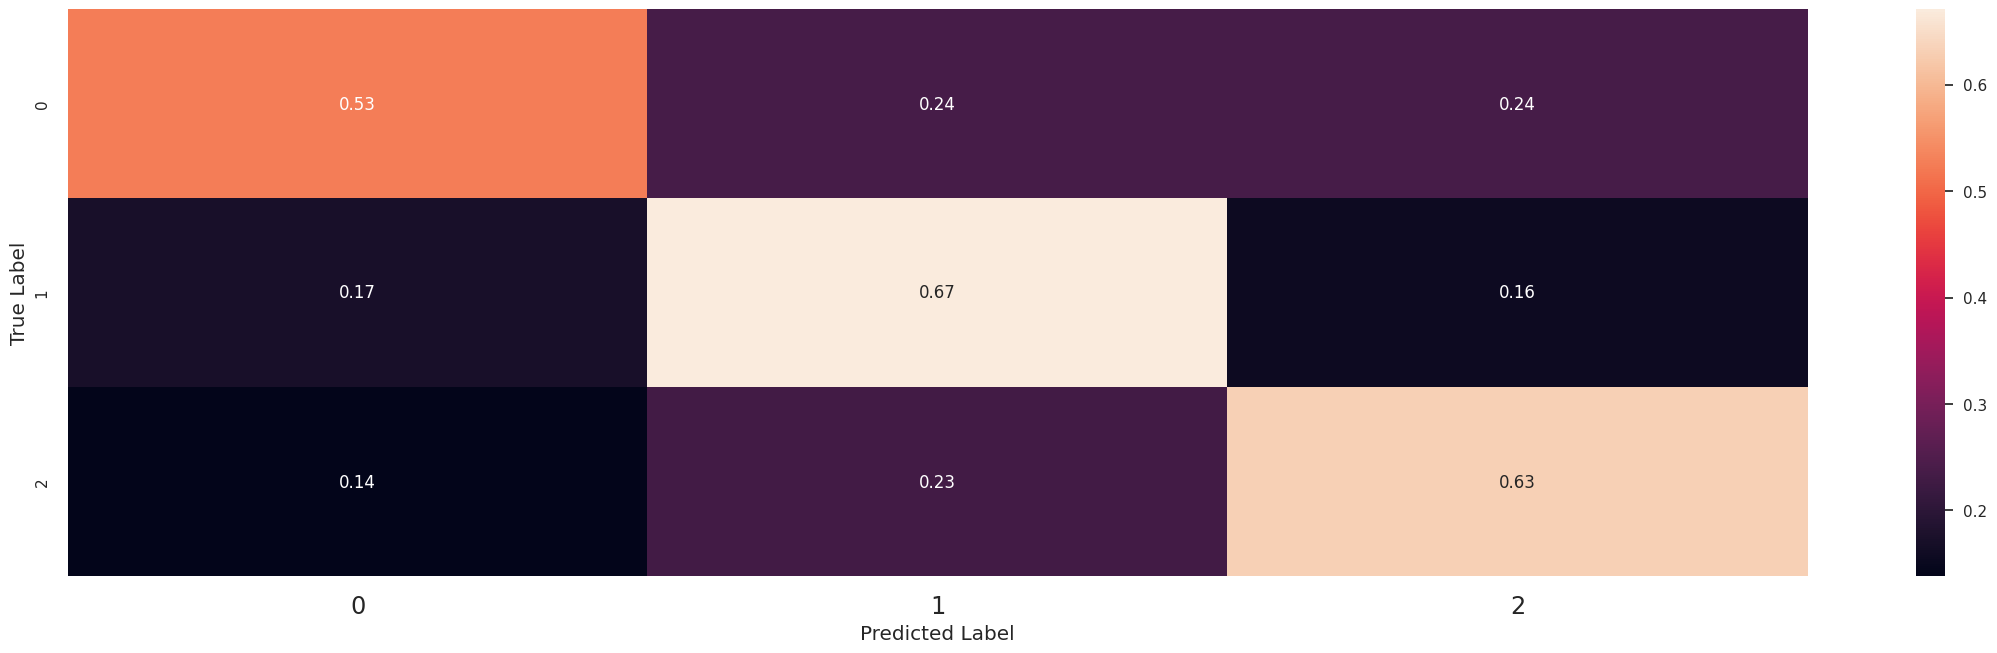

In [475]:
# renormalizing and reviewing the confusion matrix
dt_ht_conf_matrix_norm = dt_ht_conf_matrix.astype('float') / dt_ht_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(dt_ht_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [476]:
# calculating metrics for the prediction
dt_ht_metrics = metrics.classification_report(y_test, dt_ht_test_prediction, target_names=sentiment_list_unique)
print(dt_ht_metrics)

              precision    recall  f1-score   support

    Negative       0.65      0.53      0.58       350
    Positive       0.47      0.67      0.55       237
     Neutral       0.69      0.63      0.66       413

    accuracy                           0.60      1000
   macro avg       0.60      0.61      0.60      1000
weighted avg       0.62      0.60      0.61      1000



## **Random Forest Classifier**

### **Training**

In [477]:
# initializing and fitting the random forest classifier
clf_rf=RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train_vector, y_train)

RandomForestClassifier(n_estimators=10)

### **Evaluation**

In [478]:
# calculating training accuracy
rf_train_prediction = clf_rf.predict(X_train_vector)
rf_train_accuracy = accuracy_score(y_train,rf_train_prediction)
print("Training Accuracy for Random Forest:", rf_train_accuracy*100)
clf_train_accuracy.append(rf_train_accuracy)

score_rf=clf_rf.score(X_test_vector,y_test)
print("Score for Random Forest Classifier is:",score_rf*100)
clf_accuracy.append(score_rf)

Training Accuracy for Random Forest: 98.875
Score for Random Forest Classifier is: 62.9


In [479]:
# calculating the prediction
prediction_rf = clf_rf.predict(X_test_vector)

In [480]:
# creating the confusion matrix
rf_conf_matrix = confusion_matrix(y_test, prediction_rf)
rf_conf_matrix

array([[208,  85,  57],
       [ 35, 180,  22],
       [ 67, 105, 241]])

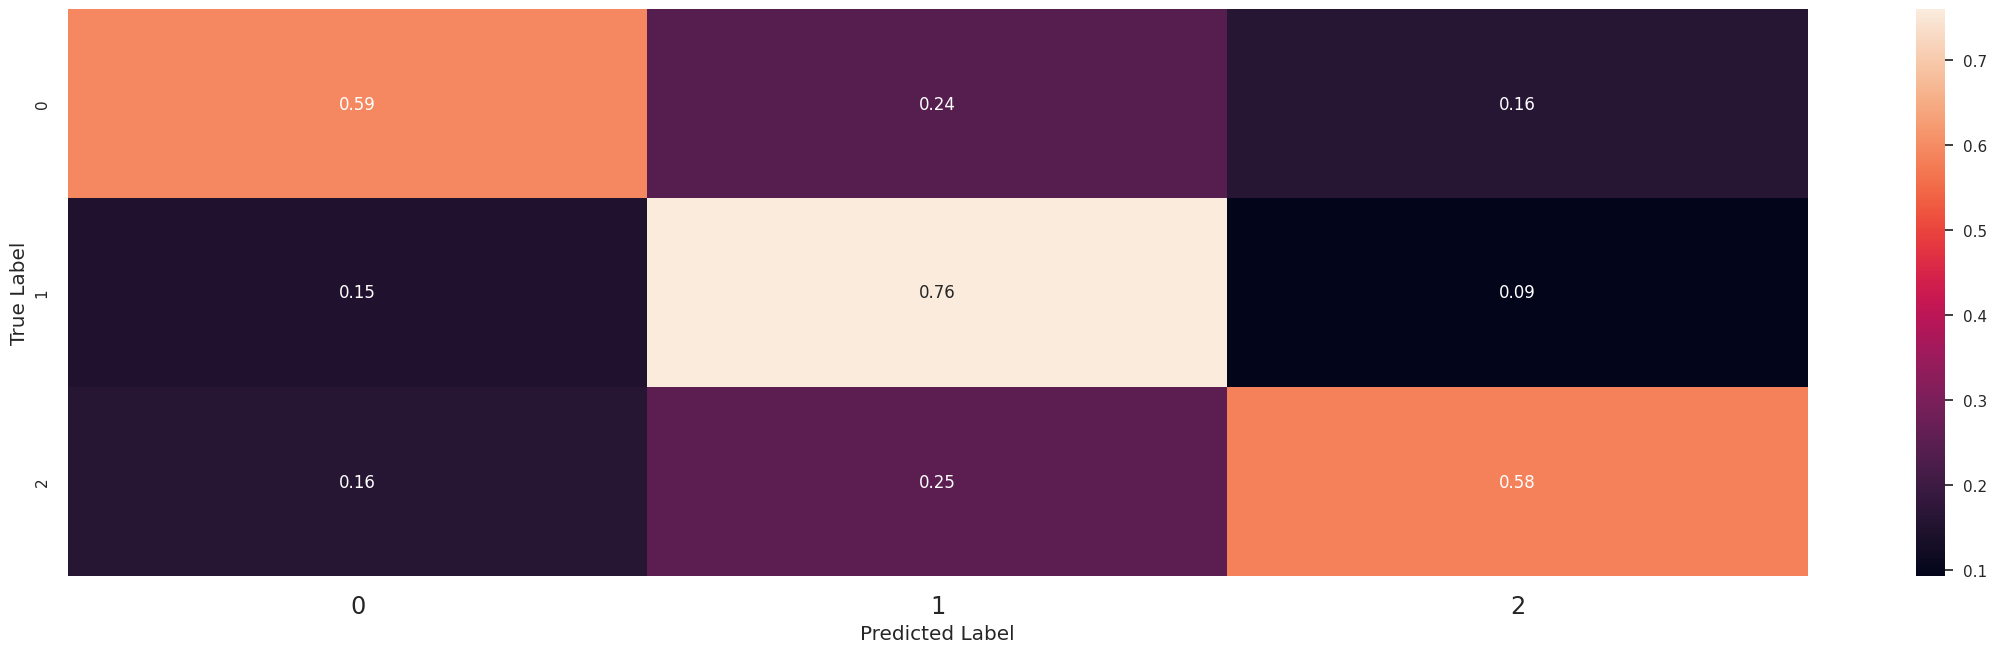

In [481]:
# normalising and plotting the confusion matrix
rf_conf_matrix_norm = rf_conf_matrix.astype('float') / rf_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(rf_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [482]:
# calculating the metrics for prediction
rf_metrics = metrics.classification_report(y_test,prediction_rf,target_names=sentiment_list_unique)
print(rf_metrics)

              precision    recall  f1-score   support

    Negative       0.67      0.59      0.63       350
    Positive       0.49      0.76      0.59       237
     Neutral       0.75      0.58      0.66       413

    accuracy                           0.63      1000
   macro avg       0.64      0.65      0.63      1000
weighted avg       0.66      0.63      0.63      1000



### **Tuning Hyperparameters**

##### **Grid Search Cross Validation**

In [483]:
# intializing grid search cross validation for hyperparameter tuning
n_estimators_list=[20,30,40]
criteron_list = ['gini','entropy']
warm_start_list=[True,False]
rf_parameters_dict = dict(n_estimators=n_estimators_list,criterion=criteron_list,warm_start=warm_start_list)
rf_grid = GridSearchCV(clf_rf, rf_parameters_dict, cv=5, scoring='accuracy')
rf_grid.fit(X_train_vector,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 30, 40],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [484]:
# viewing the best parameters
print(rf_grid.best_params_)

{'criterion': 'gini', 'n_estimators': 40, 'warm_start': True}


##### **Retraining**

In [531]:
# reinitializing and refitting the SVM classifier
rf_ht_clf = RandomForestClassifier(n_estimators=40,criterion='gini',warm_start=True)
rf_ht_clf.fit(X_train_vector,y_train)

RandomForestClassifier(n_estimators=40, warm_start=True)

##### **Revaluation**

In [486]:
# recalculating training accuracy
rf_ht_train_prediction = rf_ht_clf.predict(X_train_vector)
rf_ht_train_accuracy = accuracy_score(y_train,rf_ht_train_prediction)
print("Training Accuracy with tuned hyperparameters:",rf_ht_train_accuracy*100)
clf_train_accuracy.append(rf_ht_train_accuracy)

# recalculating testing accuracy
rf_ht_test_prediction = rf_ht_clf.predict(X_test_vector)
rf_ht_test_accuracy = accuracy_score(y_test, rf_ht_test_prediction)
print("Testing Accuracy with tuned hyperparameters:",rf_ht_test_accuracy*100)
clf_accuracy.append(rf_ht_test_accuracy)

Training Accuracy with tuned hyperparameters: 99.925
Testing Accuracy with tuned hyperparameters: 65.8


In [487]:
# creating the confusion matrix
rf_ht_conf_matrix = confusion_matrix(y_test, rf_ht_test_prediction)

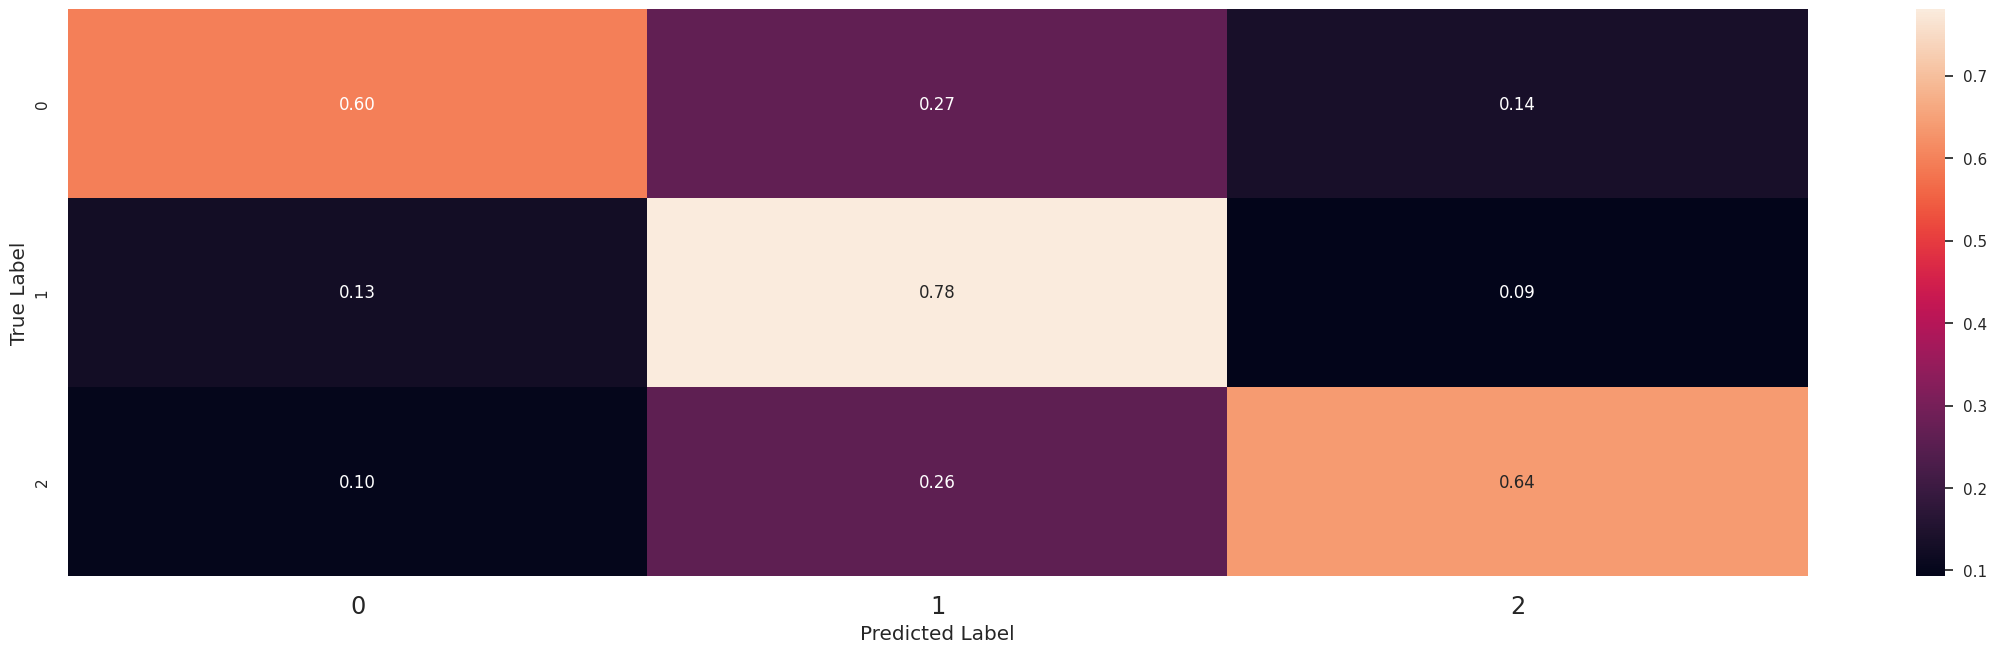

In [488]:
# renormalizing and reviewing the confusion matrix
rf_ht_conf_matrix_norm = rf_ht_conf_matrix.astype('float') / rf_ht_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(rf_ht_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [489]:
# calculating metrics for the prediction
rf_ht_metrics = metrics.classification_report(y_test, rf_ht_test_prediction, target_names=sentiment_list_unique)
print(rf_ht_metrics)

              precision    recall  f1-score   support

    Negative       0.75      0.60      0.66       350
    Positive       0.48      0.78      0.59       237
     Neutral       0.79      0.64      0.71       413

    accuracy                           0.66      1000
   macro avg       0.67      0.67      0.65      1000
weighted avg       0.70      0.66      0.66      1000



## **Naive Bayes Classifier**

### **Training**

In [490]:
# initializing and fitting the Multinomial Naive Bayes classifier
clf_mnb = MultinomialNB(alpha=0.001)
clf_mnb.fit(X_train_vector, y_train)

MultinomialNB(alpha=0.001)

### **Evaluation**

In [491]:
# calculating mean accuracy for Multinomial Naive Bayes classifier
mnb_train_prediction = clf_mnb.predict(X_train_vector)
mnb_train_accuracy = accuracy_score(y_train, mnb_train_prediction)
print("Training Accuracy:",mnb_train_accuracy*100)
clf_train_accuracy.append(mnb_train_accuracy)


score_mnb=clf_mnb.score(X_test_vector, y_test)
print("Score for Multinomial Naive Bayes Classifier is:",score_mnb*100)
clf_accuracy.append(score_mnb)

Training Accuracy: 97.575
Score for Multinomial Naive Bayes Classifier is: 57.99999999999999


In [492]:
# calculating the prediction
prediction_mnb = clf_mnb.predict(X_test_vector)

In [493]:
# creating the confusion matrix
mnb_conf_matrix = confusion_matrix(y_test, prediction_mnb)
mnb_conf_matrix

array([[231,  24,  95],
       [ 75,  97,  65],
       [129,  32, 252]])

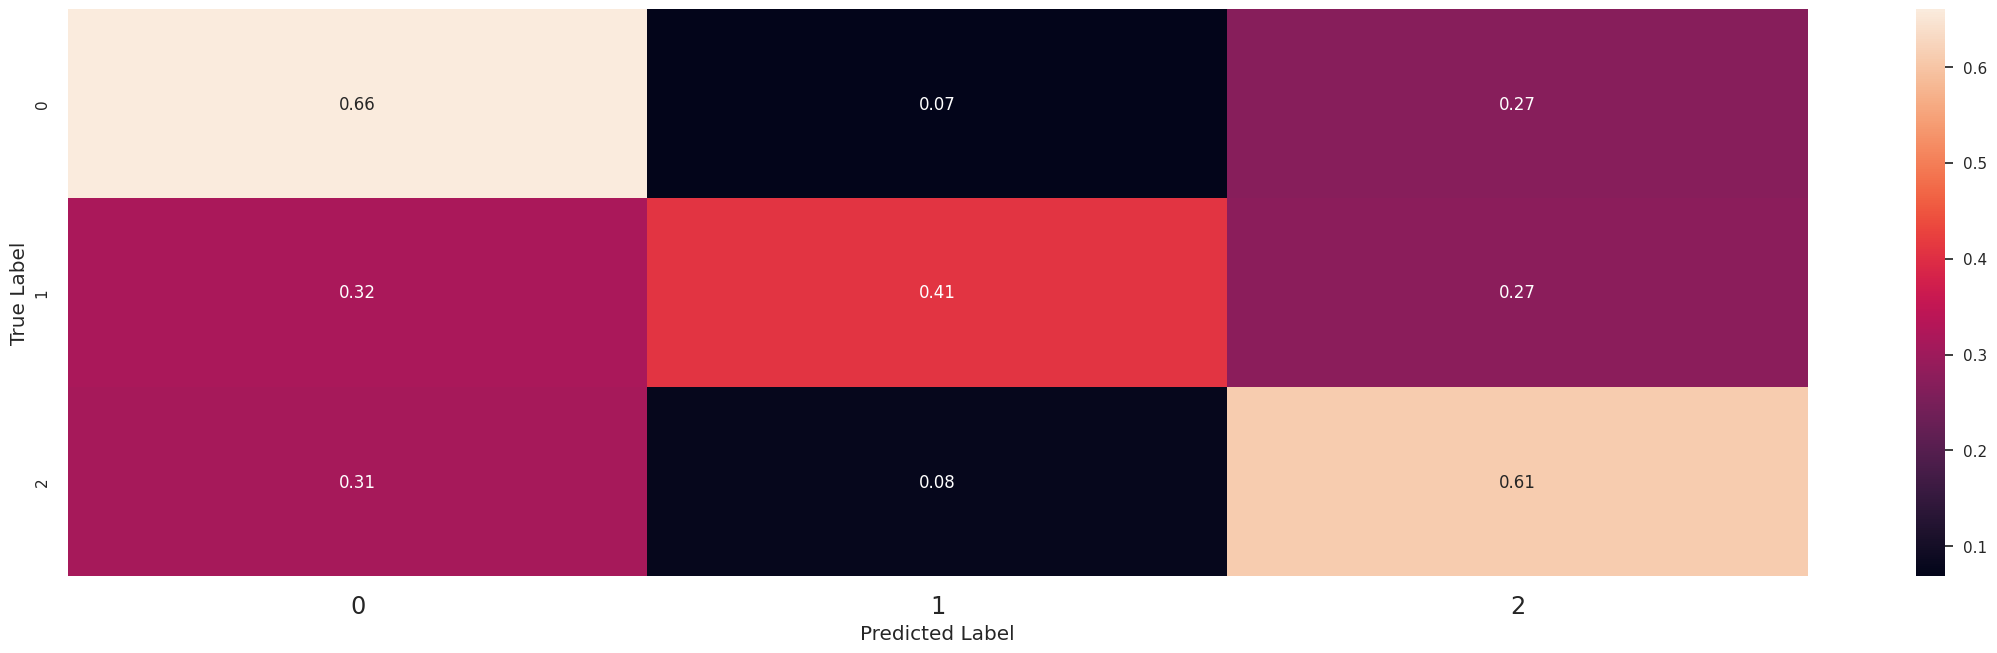

In [494]:
# normalising and viewing the confusion matrix
mnb_conf_matrix_norm = mnb_conf_matrix.astype('float') / mnb_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(mnb_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [495]:
# calculating the metrics for prediction
mnb_metrics = metrics.classification_report(y_test,prediction_mnb,target_names=sentiment_list_unique)
print(mnb_metrics)

              precision    recall  f1-score   support

    Negative       0.53      0.66      0.59       350
    Positive       0.63      0.41      0.50       237
     Neutral       0.61      0.61      0.61       413

    accuracy                           0.58      1000
   macro avg       0.59      0.56      0.57      1000
weighted avg       0.59      0.58      0.58      1000



### **Tuning Hyperparameters**

#### **Grid Search Cross Validation**

In [496]:
from sklearn.model_selection import GridSearchCV
# initializing Grid Search Cross Validation for hyperparameter tuning
alpha_range = [0.0001, 0.001, 0.01, 0.2, 0.5, 0.7, 1, 2, 5, 8, 9, 10]
fit_vals=[True,False]
all_mnb_parameters_dict = dict(alpha=alpha_range,fit_prior=fit_vals)
all_mnb_grid = GridSearchCV(clf_mnb, all_mnb_parameters_dict, cv=5, scoring='accuracy')
all_mnb_grid.fit(X_train_vector, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(alpha=0.001),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.5, 0.7, 1, 2, 5,
                                   8, 9, 10],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [497]:
# viewing the best parameters
print(all_mnb_grid.best_params_)

{'alpha': 1, 'fit_prior': False}


##### **Retraining**

In [498]:
# reinitializing and refitting the KNN Classifier
mnb_ht_clf = MultinomialNB(alpha=1,fit_prior=False)
mnb_ht_clf.fit(X_train_vector,y_train)

MultinomialNB(alpha=1, fit_prior=False)

##### **Revaluation**

In [499]:
# recalculating training accuracy
mnb_ht_train_prediction = mnb_ht_clf.predict(X_train_vector)
mnb_ht_train_accuracy = accuracy_score(y_train,mnb_ht_train_prediction)
print("Training Accuracy with tuned Hyperparameters:",mnb_ht_train_accuracy*100)
clf_train_accuracy.append(mnb_ht_train_accuracy)

# recalculating testing accuracy
mnb_ht_test_prediction = mnb_ht_clf.predict(X_test_vector)
mnb_ht_test_accuracy = accuracy_score(y_test, mnb_ht_test_prediction)
print("Testing Accuracy with tuned Hyperparameters:",mnb_ht_test_accuracy*100)
clf_accuracy.append(mnb_ht_test_accuracy)

Training Accuracy with tuned Hyperparameters: 93.175
Testing Accuracy with tuned Hyperparameters: 61.5


In [500]:
# creating the confusion matrix
mnb_ht_conf_matrix = confusion_matrix(y_test, mnb_ht_test_prediction)

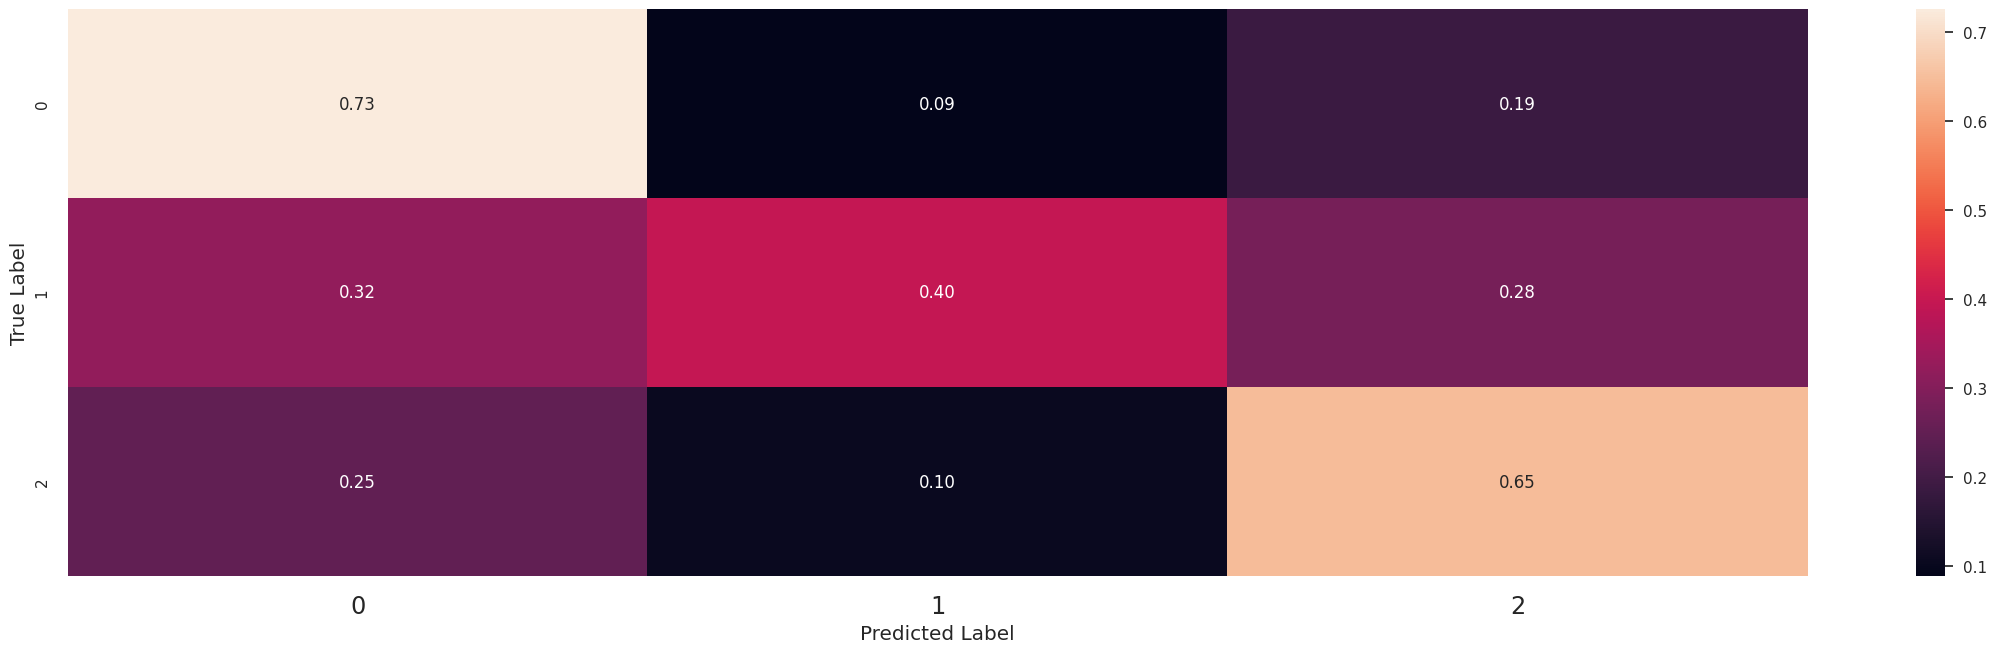

In [501]:
# renormalizing and reviewing the confusion matrix
mnb_ht_conf_matrix_norm = mnb_ht_conf_matrix.astype('float') / mnb_ht_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(mnb_ht_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [502]:
# calculating metrics for the prediction
mnb_ht_metrics = metrics.classification_report(y_test, mnb_ht_test_prediction, target_names=sentiment_list_unique)
print(mnb_ht_metrics)

              precision    recall  f1-score   support

    Negative       0.59      0.73      0.65       350
    Positive       0.56      0.40      0.46       237
     Neutral       0.67      0.65      0.66       413

    accuracy                           0.61      1000
   macro avg       0.61      0.59      0.59      1000
weighted avg       0.61      0.61      0.61      1000



## **Support Vector Machine Classifier**

#### **Training**

In [503]:
from sklearn.svm import LinearSVC
# initializing and fitting the SVM classifier
svm_clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, multi_class='ovr', max_iter=1000)
svm_clf.fit(X_train_vector,y_train)

LinearSVC(dual=False)

#### **Evaluation**

In [504]:
# calculating training accuracy
svm_train_prediction = svm_clf.predict(X_train_vector)
svm_train_accuracy = accuracy_score(y_train,svm_train_prediction)
print("Training Accuracy for SVM Classifier:",svm_train_accuracy*100)
clf_train_accuracy.append(svm_train_accuracy)

# calculating testing accuracy
svm_test_prediction = svm_clf.predict(X_test_vector)
svm_test_accuracy = accuracy_score(y_test, svm_test_prediction)
print("Testing Accuracy for SVM Classifier:",svm_test_accuracy*100)
clf_accuracy.append(svm_test_accuracy)

Training Accuracy for SVM Classifier: 99.925
Testing Accuracy for SVM Classifier: 65.5


In [505]:
# creating the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_test_prediction)

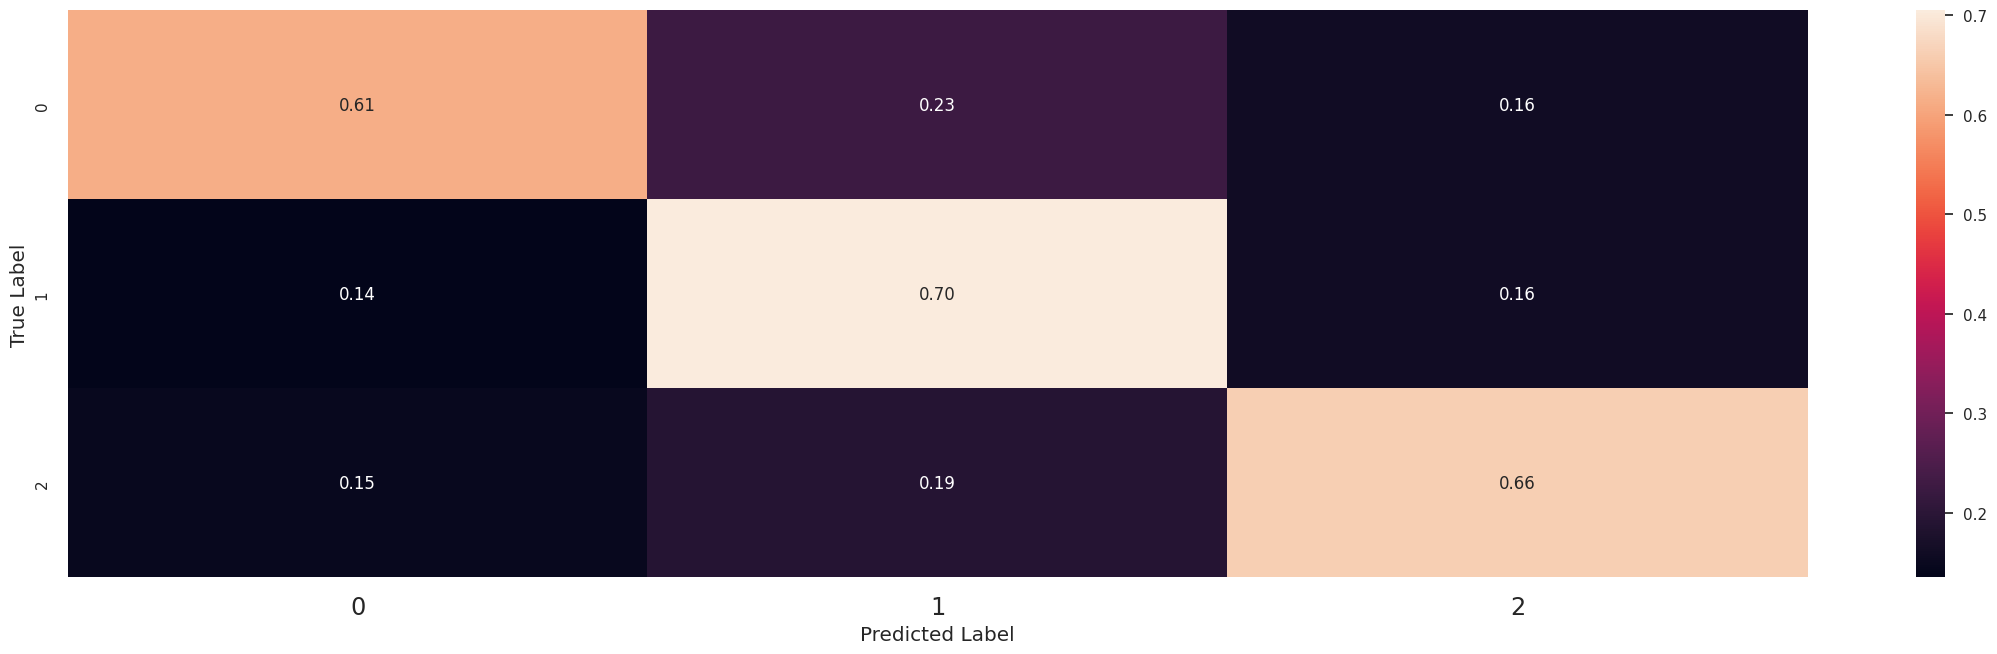

In [506]:
# normalizing and viewing the confusion matrix
svm_conf_matrix_norm = svm_conf_matrix.astype('float') / svm_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(svm_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [507]:
# calculating metrics for the prediction
svm_metrics = metrics.classification_report(y_test, svm_test_prediction,target_names=sentiment_list_unique)
print(svm_metrics)

              precision    recall  f1-score   support

    Negative       0.70      0.61      0.65       350
    Positive       0.51      0.70      0.59       237
     Neutral       0.74      0.66      0.70       413

    accuracy                           0.66      1000
   macro avg       0.65      0.66      0.65      1000
weighted avg       0.67      0.66      0.66      1000



#### **Tuning Hyperparameters**

##### **Grid Search Cross Validation**

In [508]:
# intializing grid search cross validation for hyperparameter tuning
penalty_values=['l1','l2']
tolerance_values = [0.1,0.001]
C_values=[2,5,10]
svm_parameters_dict = dict(penalty=penalty_values, C=C_values, tol=tolerance_values)
svm_grid = GridSearchCV(svm_clf, svm_parameters_dict, cv=5, scoring='accuracy')
svm_grid.fit(X_train_vector,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(dual=False),
             param_grid={'C': [2, 5, 10], 'penalty': ['l1', 'l2'],
                         'tol': [0.1, 0.001]},
             scoring='accuracy')

In [509]:
# viewing the best parameters
print(svm_grid.best_params_)

{'C': 2, 'penalty': 'l1', 'tol': 0.001}


##### **Retraining**

In [510]:
# reinitializing and refitting the SVM classifier
svm_ht_clf = LinearSVC(penalty='l1',dual=False, C=5, tol=0.001)
svm_ht_clf.fit(X_train_vector,y_train)

LinearSVC(C=5, dual=False, penalty='l1', tol=0.001)

##### **Revaluation**

In [511]:
# recalculating training accuracy
svm_ht_train_prediction = svm_ht_clf.predict(X_train_vector)
svm_ht_train_accuracy = accuracy_score(y_train,svm_ht_train_prediction)
print("Training Accuracy with tuned hyperparameters:",svm_ht_train_accuracy*100)
clf_train_accuracy.append(svm_ht_train_accuracy)

# recalculating testing accuracy
svm_ht_test_prediction = svm_ht_clf.predict(X_test_vector)
svm_ht_test_accuracy = accuracy_score(y_test, svm_ht_test_prediction)
print("Test Accuracy with tuned hyperparameters:",svm_ht_test_accuracy*100)
clf_accuracy.append(svm_ht_test_accuracy)

Training Accuracy with tuned hyperparameters: 99.97500000000001
Test Accuracy with tuned hyperparameters: 69.69999999999999


In [512]:
# creating the confusion matrix
svm_ht_conf_matrix = confusion_matrix(y_test, svm_ht_test_prediction)

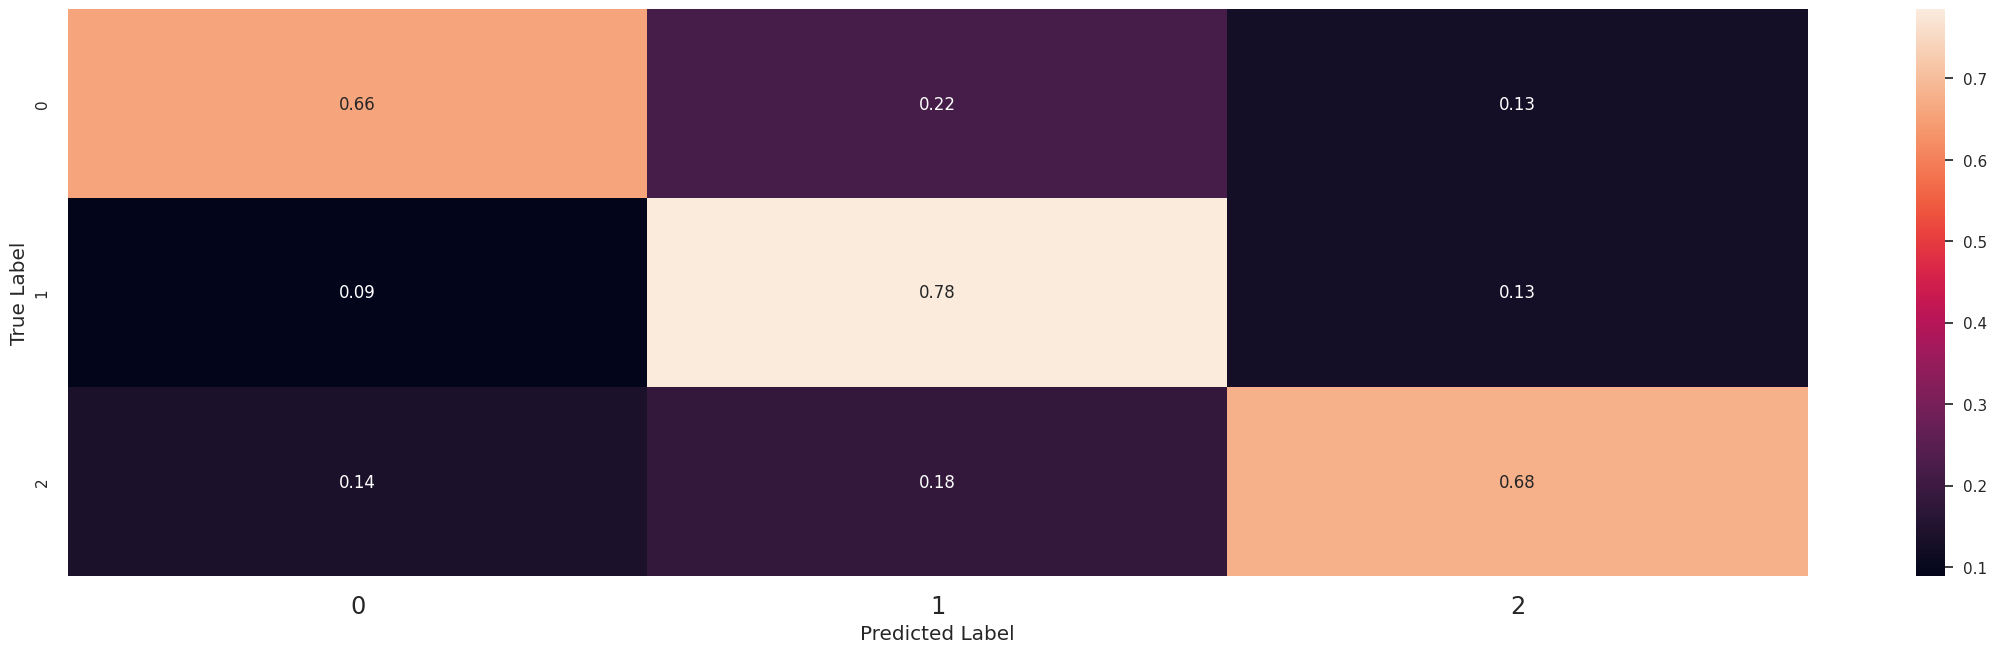

In [513]:
# renormalizing and reviewing the confusion matrix
svm_ht_conf_matrix_norm = svm_ht_conf_matrix.astype('float') / svm_ht_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(svm_ht_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [514]:
# calculating metrics for the prediction
svm_ht_metrics = metrics.classification_report(y_test, svm_ht_test_prediction, target_names=sentiment_list_unique)
print(svm_ht_metrics)

              precision    recall  f1-score   support

    Negative       0.75      0.66      0.70       350
    Positive       0.55      0.78      0.65       237
     Neutral       0.79      0.68      0.73       413

    accuracy                           0.70      1000
   macro avg       0.70      0.71      0.69      1000
weighted avg       0.72      0.70      0.70      1000



## **Ensemble Methods**

### **Bagging Classifier**

In [515]:
# initializing the bagging classifier
clf_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,oob_score=True)

In [516]:
cross_validation = RepeatedStratifiedKFold(n_splits=8, n_repeats=3)
model_score = cross_val_score(clf_bagging, X_test_vector, y_test, scoring='accuracy', cv=cross_validation, n_jobs=-1, error_score='raise')

In [517]:
print('Bagging Model Score: %.3f' % (mean(model_score)))

Bagging Model Score: 0.569


In [518]:
bagging_scores=[mean(model_score),'','']
bagging_scores.reverse

<function list.reverse>

### **Adaboost Classifier**

In [519]:
# initializing the adaboost classifier
clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,learning_rate=0.001)
ada_model_score = cross_val_score(clf_ada, X_test_vector, y_test, cv=40)

In [520]:
print("AdaBoost Model Score:",ada_model_score.mean())

AdaBoost Model Score: 0.542


In [521]:
adaboost_scores=[mean(ada_model_score),'','']
adaboost_scores.reverse

<function list.reverse>

In [522]:
ensemble_clf_list=['Bagging', 'AdaBoost']
ensemble_accuracy_list=[mean(model_score),ada_model_score.mean()]

In [523]:
ensemble_accuracy_compare = pd.DataFrame({'Classifier': ensemble_clf_list, 'Accuracy': ensemble_accuracy_list})

In [524]:
ensemble_accuracy_compare

,Classifier,Accuracy
0,Bagging,0.569
1,AdaBoost,0.542


In the attempt to improve the accuracy for detecting the correct sentiment, the data was trained on Bagging Classifier and AdaBoost Classifier, but the test accuracies were not satisfactory.

## **Comparing Accuracies**

### **Comparing Test Accuracies**

In [525]:
#storing test accuracy in a dataframe
clf_name=['Random Forest', 'RF Hypertuned','Multinomial Naive Bayes','MNB Hypertuned',
          'Decision Tree','DT Hypertuned','Support Vector Machine','SVM Hypertuned']
all_model_acc_compare = pd.DataFrame({'Algorithm' : clf_name, 'Testing_Accuracy' : clf_accuracy})

[Text(0, 0, 'Random Forest'),
 Text(0, 0, 'RF Hypertuned'),
 Text(0, 0, 'Multinomial Naive Bayes'),
 Text(0, 0, 'MNB Hypertuned'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'DT Hypertuned'),
 Text(0, 0, 'Support Vector Machine'),
 Text(0, 0, 'SVM Hypertuned')]

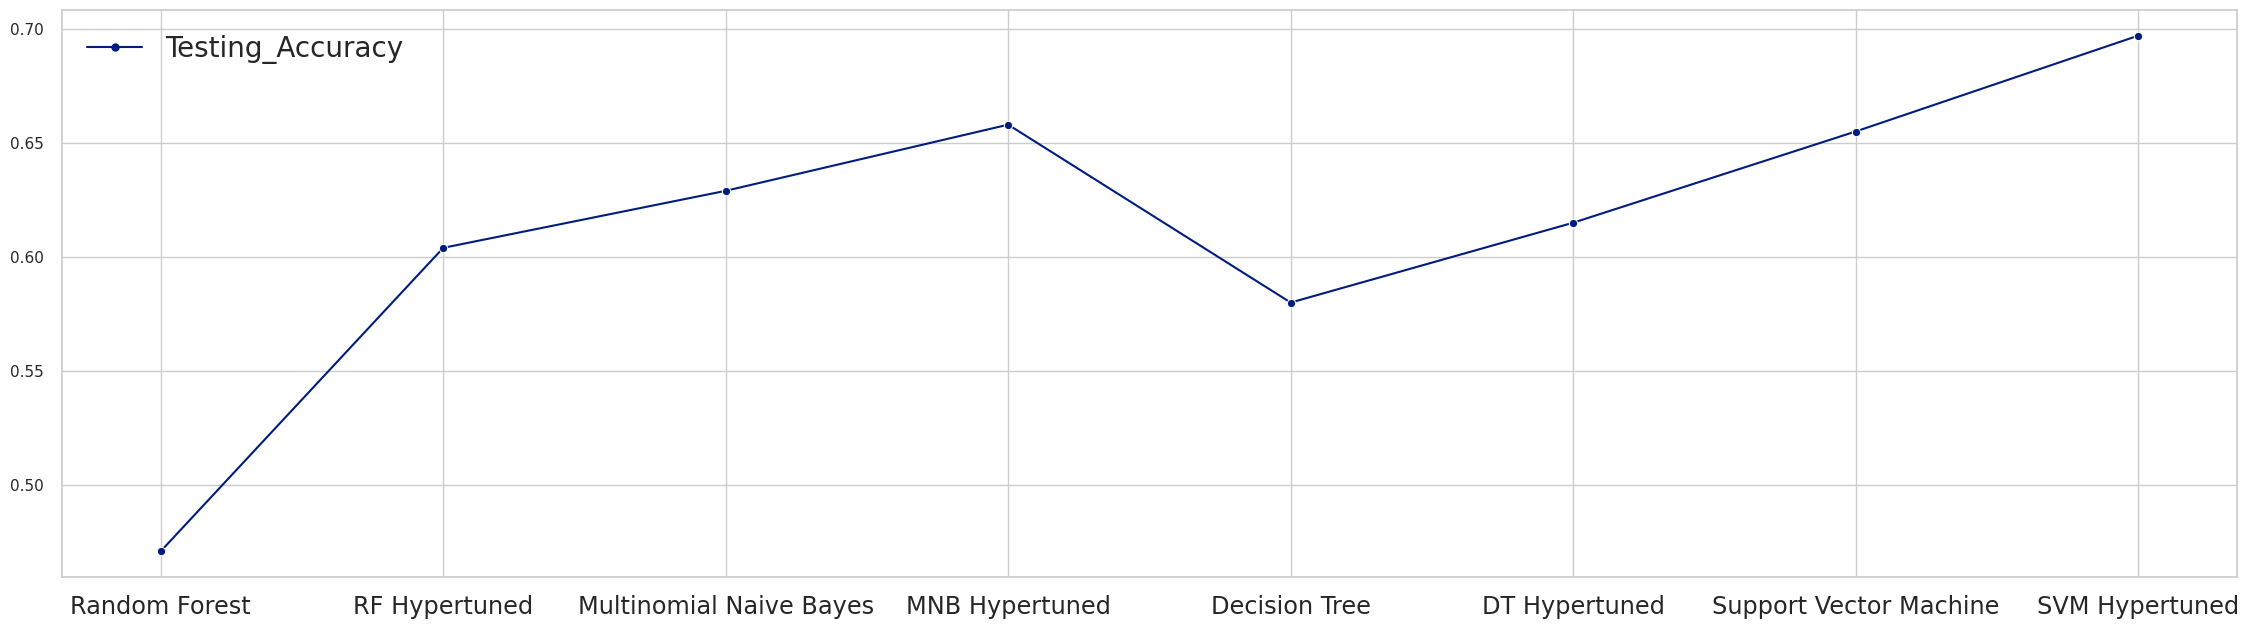

In [526]:
# visualizing the testing accuracies
from matplotlib import pyplot as plt
ax=sns.lineplot(data=[all_model_acc_compare['Testing_Accuracy']],dashes=False,markers=True)
ax.set_xticks(range(len(all_model_acc_compare['Algorithm'])))
ax.set_xticklabels(all_model_acc_compare['Algorithm'])

The line plot of the testing accuracies illustrates that 

1. The test accuracy of each classifier has increased after tuning the hyperparameters.
2. Random Forest classifier has shown significant improvement in the performance. After retraining with the best parameters, its testing accuracy is improved by 13%.
3. The test accuracy of the Hypertuned SVM Classifier is the highest among all the classifiers at ~70%.
4. Vanilla counterpart of Random Forest Classifier is the least efficient classifier among others.

### **Comparing Train and Test Accuracies**

In [527]:
# comparing training and testing accuracies
all_model_acc_compare = pd.DataFrame({'Algorithm' : clf_name, 'Training_Accuracy' : clf_train_accuracy, 'Testing_Accuracy' : clf_accuracy})
all_model_acc_compare

,Algorithm,Training_Accuracy,Testing_Accuracy
0,Random Forest,0.48125,0.471
1,RF Hypertuned,0.99975,0.604
2,Multinomial Naive Bayes,0.98875,0.629
3,MNB Hypertuned,0.99925,0.658
4,Decision Tree,0.97575,0.580
5,DT Hypertuned,0.93175,0.615
6,Support Vector Machine,0.99925,0.655
7,SVM Hypertuned,0.99975,0.697


Upon Comparing the training and testing accuracy of all the classifiers, it is observed that,

1. There is a huge gap between the training and testing accuracies of all the classifiers except Random Forest, this is an indication of overfitting.

2. The train accuracy of the Random Forest classifier has improved significantly after hypertuning of the parameters.

3. Random Forest classifier has no gap in train and test accuracies, but it is the least efficient classifier among all.

[Text(0, 0, 'Random Forest'),
 Text(0, 0, 'RF Hypertuned'),
 Text(0, 0, 'Multinomial Naive Bayes'),
 Text(0, 0, 'MNB Hypertuned'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'DT Hypertuned'),
 Text(0, 0, 'Support Vector Machine'),
 Text(0, 0, 'SVM Hypertuned')]

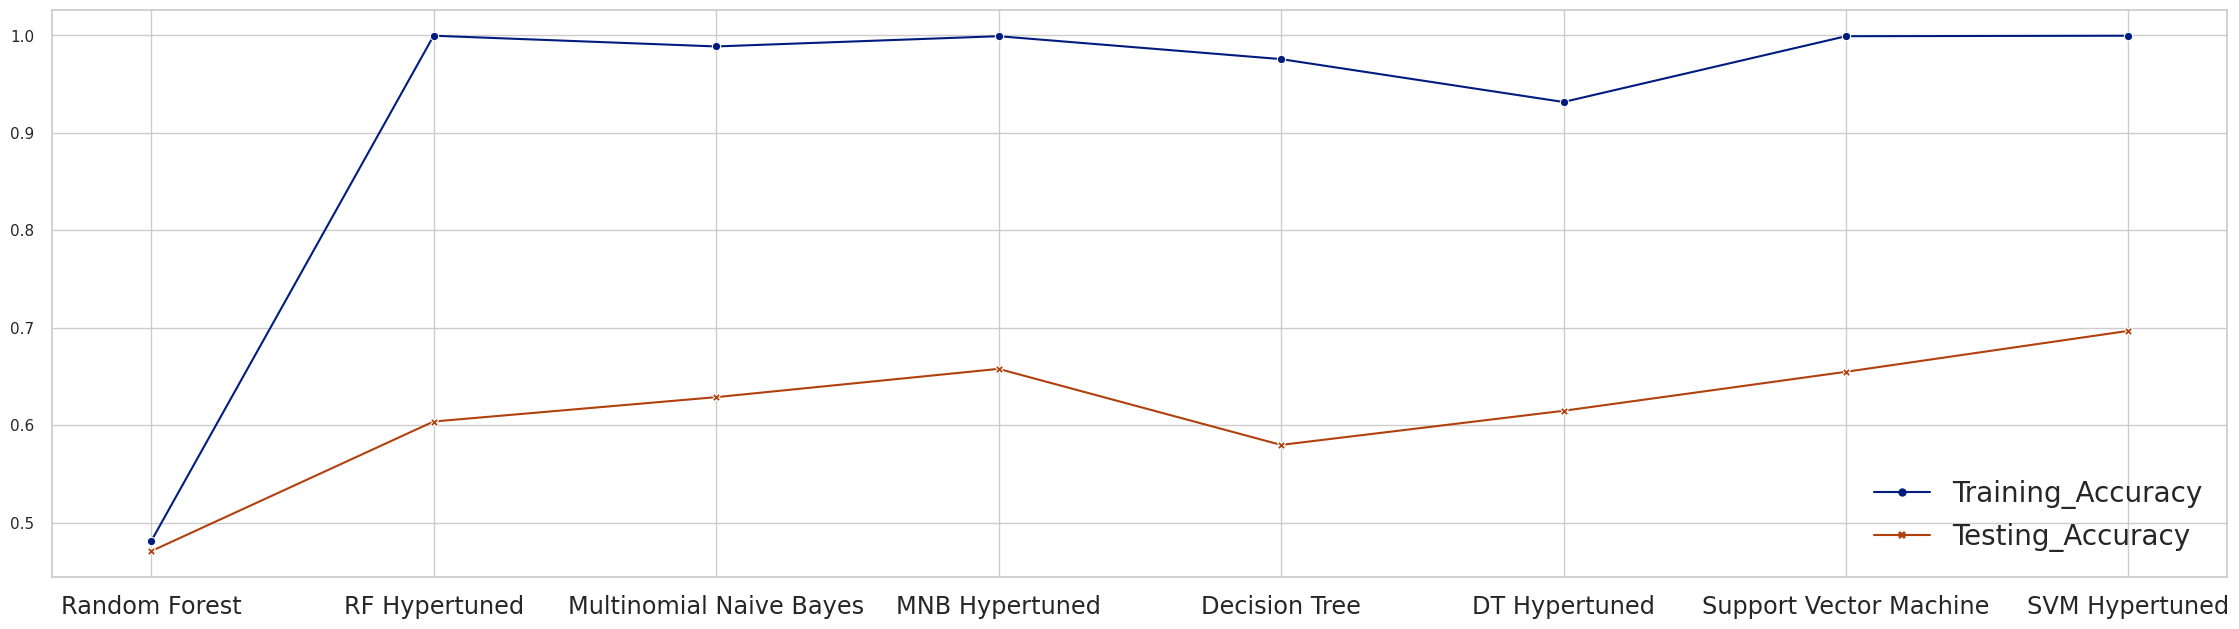

In [528]:
# visualizing the training and testing accuracies
ax = sns.lineplot(data=[all_model_acc_compare['Training_Accuracy'], all_model_acc_compare['Testing_Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(all_model_acc_compare['Algorithm'])))
ax.set_xticklabels(all_model_acc_compare['Algorithm'])

The line plot above visualizes the gap between training and testing accuracies for all the classifiers.

## **Comparing Metrics**

In [529]:
# calculating all the performance metrics
precision_score.extend([metrics.precision_score(y_test, prediction_dt,average="weighted")*100,
                        metrics.precision_score(y_test, dt_ht_test_prediction,average="weighted")*100,
                            metrics.precision_score(y_test, prediction_mnb,average="weighted")*100,
                        metrics.precision_score(y_test, mnb_ht_test_prediction,average="weighted")*100,
                            metrics.precision_score(y_test, prediction_rf,average="weighted")*100,
                       metrics.precision_score(y_test, rf_ht_test_prediction,average="weighted")*100,
                       metrics.precision_score(y_test, svm_test_prediction,average="weighted")*100,
                       metrics.precision_score(y_test, svm_ht_test_prediction,average="weighted")*100])

recall_score.extend([metrics.recall_score(y_test, prediction_dt,average="weighted")*100,
                        metrics.recall_score(y_test, dt_ht_test_prediction,average="weighted")*100,
                            metrics.recall_score(y_test, prediction_mnb,average="weighted")*100,
                        metrics.recall_score(y_test, mnb_ht_test_prediction,average="weighted")*100,
                            metrics.recall_score(y_test, prediction_rf,average="weighted")*100,
                       metrics.recall_score(y_test, rf_ht_test_prediction,average="weighted")*100,
                       metrics.recall_score(y_test, svm_test_prediction,average="weighted")*100,
                       metrics.recall_score(y_test, svm_ht_test_prediction,average="weighted")*100])

f1_score.extend([metrics.f1_score(y_test, prediction_dt,average="weighted")*100,
                        metrics.f1_score(y_test, dt_ht_test_prediction,average="weighted")*100,
                            metrics.f1_score(y_test, prediction_mnb,average="weighted")*100,
                        metrics.f1_score(y_test, mnb_ht_test_prediction,average="weighted")*100,
                            metrics.f1_score(y_test, prediction_rf,average="weighted")*100,
                       metrics.f1_score(y_test, rf_ht_test_prediction,average="weighted")*100,
                       metrics.f1_score(y_test, svm_test_prediction,average="weighted")*100,
                       metrics.f1_score(y_test, svm_ht_test_prediction,average="weighted")*100])

In [530]:
# displaying all the performance metrics
comp_metric = pd.DataFrame({'Model' : ['Decision Tree','DT Hypertuned','Multinomial Naive Bayes','MNB Hypertuned','Random Forest', 'RF Hypertuned',
                                       'Support Vector Machine','SVM Hypertuned'],
                       'Precision' : precision_score,
                       'Recall' : recall_score,
                       'F1' : f1_score,
                       'Test_Accuracy' : clf_accuracy},
                       index=[0,1,2,3,4,5,6,7])
comp_metric

,Model,Precision,Recall,F1,Test_Accuracy
0,Decision Tree,63.920100,47.1,41.220696,0.471
1,DT Hypertuned,62.310905,60.4,60.661601,0.604
2,Multinomial Naive Bayes,58.872862,58.0,57.618502,0.629
3,MNB Hypertuned,61.428734,61.5,60.869361,0.658
4,Random Forest,66.117663,62.9,63.274327,0.580
5,RF Hypertuned,70.128120,65.8,66.489632,0.615
6,Support Vector Machine,67.331770,65.5,65.867394,0.655
7,SVM Hypertuned,71.908062,69.7,70.049802,0.697


From the table above, following are the observations:

1. The test accuracy of the SVM Classifier is highest among all. It can correctly predict the sentiments from the tweets 69.7% of time. Also, 71.9% of the total positive predictions made were correct for RF classifier.

2. The Decision Tree Classifier has the lowest accuracy among all the other classifiers. It can predict the correct sentiment over 47.1% of times.

3. Overall, the accuracies of these classifiers are not satisfactory for predicting the correct sentiment from the tweets.


# **Emotion Detecion**

In [532]:
# copying the sentiment data into a new dataframe
emotion_data = tweets_data

In [533]:
# analyzing the emotions of tweens and adding them to the dataframe
emotion_data["Emotion"] = [te.get_emotion(iterator) for iterator in emotion_data['Text']]

In [534]:
emotion_data.head()

,Date_Time,Tweet_Id,Text,Positive,Negative,Neutral,Compound,Sentiment,Emotion
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...,0.000,0.220,0.780,-0.4767,Negative,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.25,..."
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...,0.000,0.000,1.000,0.0000,Neutral,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...,0.000,0.056,0.944,-0.2960,Negative,"{'Happy': 0.0, 'Angry': 0.29, 'Surprise': 0.14..."
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...,0.133,0.000,0.867,0.3182,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...,0.078,0.096,0.826,-0.1027,Negative,"{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.0..."


In [535]:
# analyzing the weight of each emotion for each tweet
emotion_dataframe = pd.DataFrame(emotion_data["Emotion"].values.tolist(), index=emotion_data.index)
emotion_dataframe

,Happy,Angry,Surprise,Sad,Fear
0,0.00,0.00,0.25,0.50,0.25
1,0.00,0.00,0.00,0.33,0.67
2,0.00,0.29,0.14,0.14,0.43
3,0.00,0.00,0.00,0.50,0.50
4,0.33,0.33,0.00,0.33,0.00
...,...,...,...,...,...
4995,0.25,0.00,0.00,0.00,0.75
4996,0.50,0.00,0.00,0.00,0.50
4997,0.00,0.00,0.00,0.17,0.83
4998,0.29,0.00,0.14,0.14,0.43


In [536]:
# adding new emotions to our original dataframe and dropping the sentiments
emotion_data["Happy"] = emotion_dataframe["Happy"]
emotion_data.drop('Emotion', axis=1, inplace=True)
emotion_data.drop(['Positive','Negative', 'Neutral', 'Compound'], axis=1, inplace=True)

In [537]:
emotion_data.head()

,Date_Time,Tweet_Id,Text,Sentiment,Happy
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...,Negative,0.00
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...,Neutral,0.00
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...,Negative,0.00
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...,Positive,0.00
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...,Negative,0.33


## **Feature Engineering**

In [538]:
# adding the rest of the emotions
emotion_data["Angry"] = emotion_dataframe["Angry"]
emotion_data["Surprise"] = emotion_dataframe["Surprise"]
emotion_data["Sad"] = emotion_dataframe["Sad"]
emotion_data["Fear"] = emotion_dataframe["Fear"]

In [539]:
emotion_data.head()

,Date_Time,Tweet_Id,Text,Sentiment,Happy,Angry,Surprise,Sad,Fear
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...,Negative,0.00,0.00,0.25,0.50,0.25
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...,Neutral,0.00,0.00,0.00,0.33,0.67
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...,Negative,0.00,0.29,0.14,0.14,0.43
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...,Positive,0.00,0.00,0.00,0.50,0.50
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...,Negative,0.33,0.33,0.00,0.33,0.00


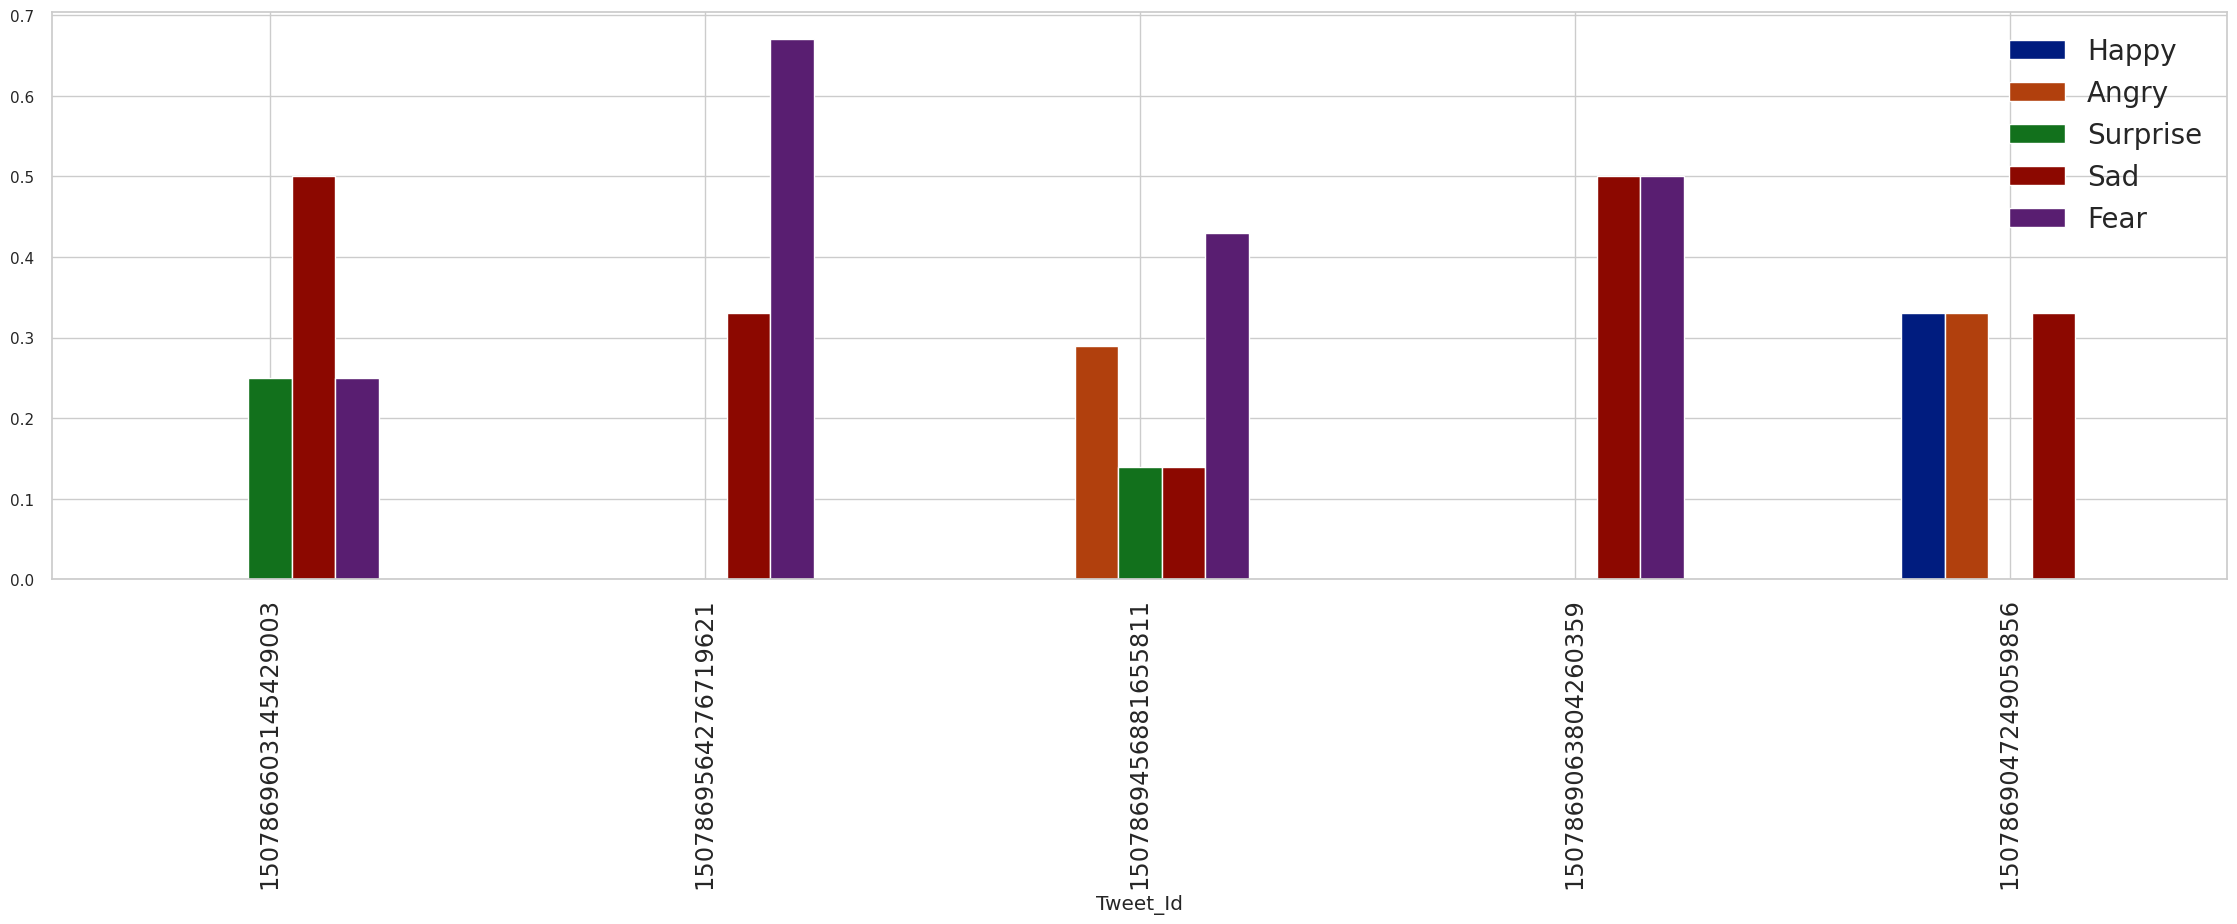

In [540]:
# visualizing the emotion dataframe
emotion_data[:5].plot(x="Tweet_Id", y=["Happy", "Angry","Surprise","Sad","Fear"], kind="bar")
plt.show()

In [541]:
# deciding the emotion of each tweet by selecting emotion with maximum weight
emotion_data['Emotion'] = emotion_data[["Happy", "Angry","Surprise","Sad","Fear"]].idxmax(axis=1)

In [542]:
emotion_data.head()

,Date_Time,Tweet_Id,Text,Sentiment,Happy,Angry,Surprise,Sad,Fear,Emotion
0,2022-03-26 23:58:22+00:00,1507869603145429003,real people are really dying from covid becaus...,Negative,0.00,0.00,0.25,0.50,0.25,Sad
1,2022-03-26 23:58:13+00:00,1507869564276719621,the worldhealthorganisation who has a rule of ...,Neutral,0.00,0.00,0.00,0.33,0.67,Fear
2,2022-03-26 23:57:48+00:00,1507869456881655811,this and that this government believes covid h...,Negative,0.00,0.29,0.14,0.14,0.43,Fear
3,2022-03-26 23:56:14+00:00,1507869063804260359,if you werent mandated into getting vaccinated...,Positive,0.00,0.00,0.00,0.50,0.50,Sad
4,2022-03-26 23:56:10+00:00,1507869047249059856,wski fine coughing up a lung there get me away...,Negative,0.33,0.33,0.00,0.33,0.00,Happy


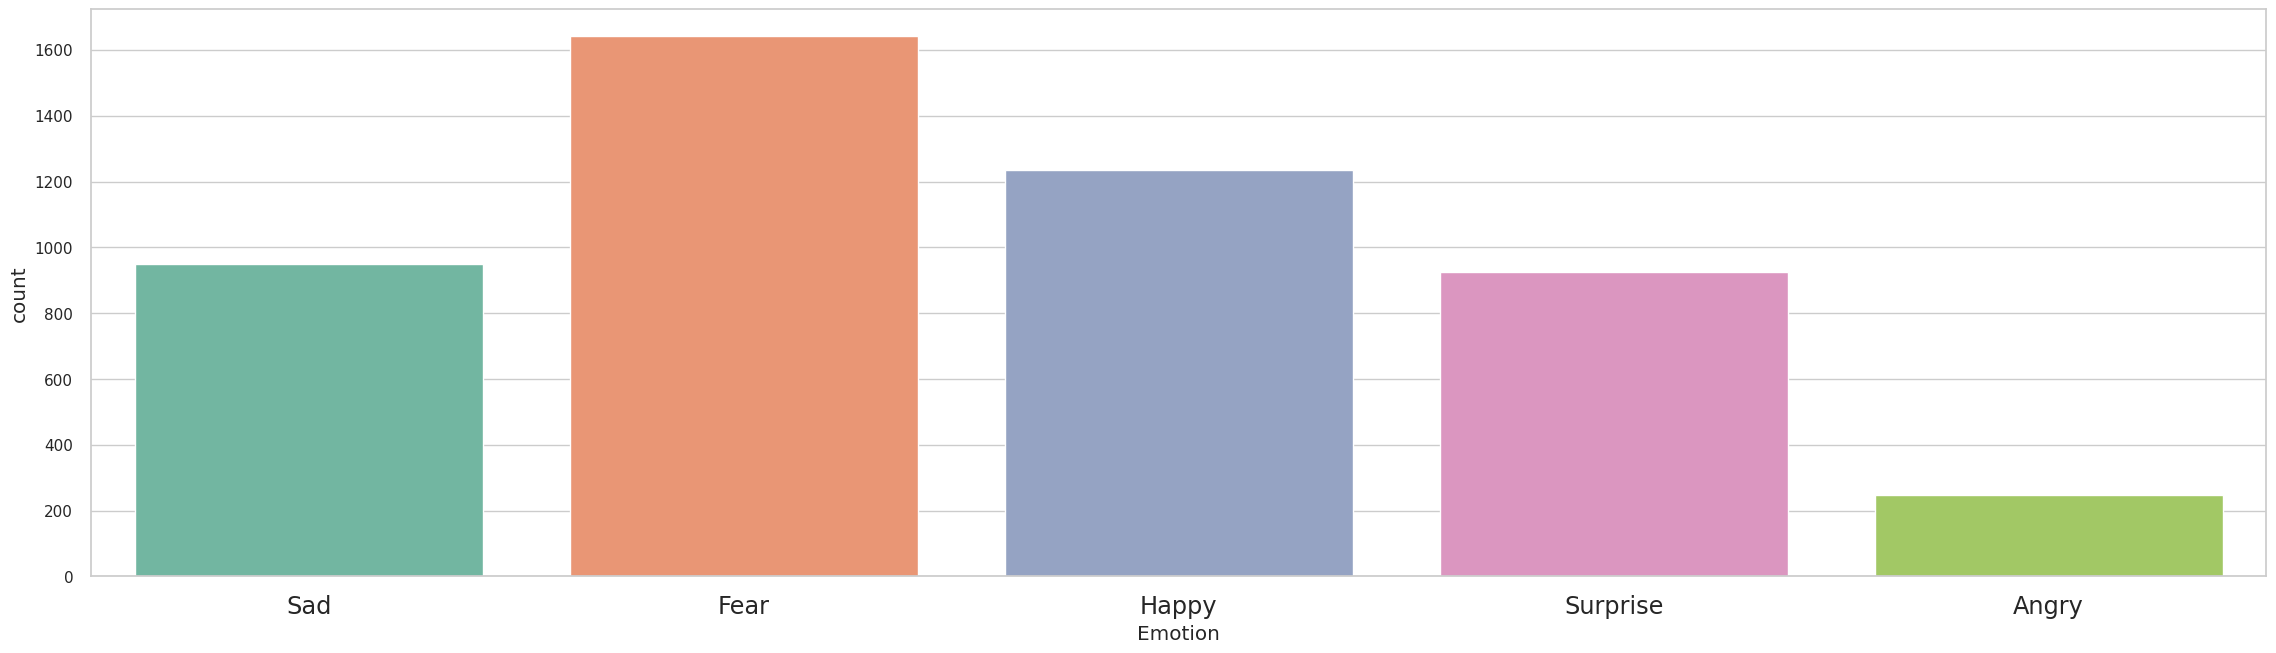

In [543]:
# visualizing the count of each emotion
bp = sns.countplot(x="Emotion", data=emotion_data, palette="Set2")
plt.show()

From the plot above, it can be visualized that our model predicted that, Most of the tweets in the data are associated with Fear emotion, followed by Happy, Sad, Surprised, and Angry.



## **Corelation Matrix**

In [544]:
# analyzing the corelation between our emotions and tweets
emotion_data.corr()

,Tweet_Id,Happy,Angry,Surprise,Sad,Fear
Tweet_Id,1.000000,0.008542,0.009632,-0.005001,0.026807,-0.032417
Happy,0.008542,1.000000,-0.075110,-0.132062,-0.147058,-0.234309
Angry,0.009632,-0.075110,1.000000,-0.073755,-0.092922,-0.125436
Surprise,-0.005001,-0.132062,-0.073755,1.000000,-0.180619,-0.283853
Sad,0.026807,-0.147058,-0.092922,-0.180619,1.000000,-0.312428
Fear,-0.032417,-0.234309,-0.125436,-0.283853,-0.312428,1.000000


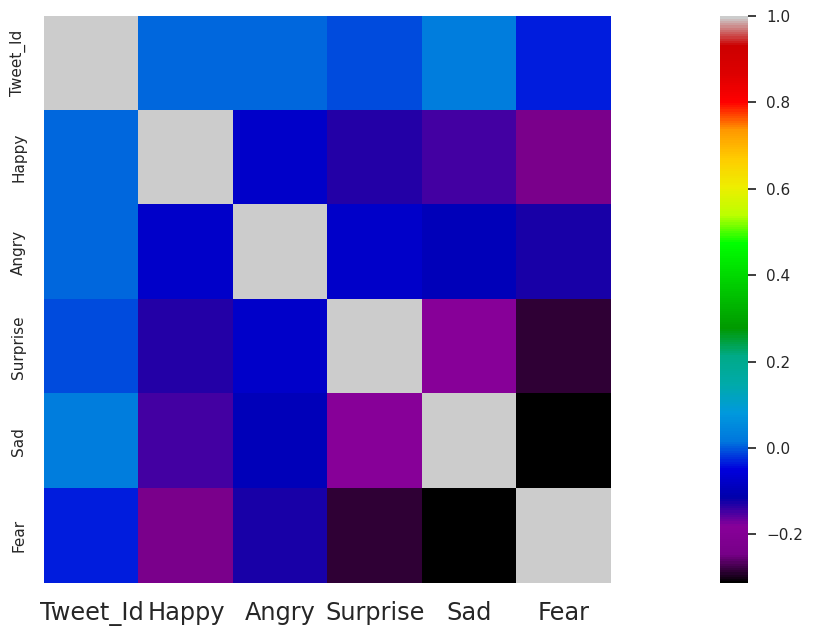

In [545]:
# visualizing the corelation matrix
sns.heatmap(emotion_data.corr(), square=True, cmap='nipy_spectral')
plt.show()

In [546]:
# saving the emotion dataframe as csv file
emotion_data.to_csv('aml_emotion_toxicity_data.csv')

## **Splitting the Emotion data**

In [547]:
training_data_emotion = emotion_data.iloc[:4000]
testing_data_emotion = emotion_data.iloc[:4000,:5000]

In [548]:
training_data_emotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date_Time  4000 non-null   datetime64[ns, UTC]
 1   Tweet_Id   4000 non-null   int64              
 2   Text       4000 non-null   object             
 3   Sentiment  4000 non-null   object             
 4   Happy      4000 non-null   float64            
 5   Angry      4000 non-null   float64            
 6   Surprise   4000 non-null   float64            
 7   Sad        4000 non-null   float64            
 8   Fear       4000 non-null   float64            
 9   Emotion    4000 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(3)
memory usage: 343.8+ KB


In [549]:
testing_data_emotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date_Time  4000 non-null   datetime64[ns, UTC]
 1   Tweet_Id   4000 non-null   int64              
 2   Text       4000 non-null   object             
 3   Sentiment  4000 non-null   object             
 4   Happy      4000 non-null   float64            
 5   Angry      4000 non-null   float64            
 6   Surprise   4000 non-null   float64            
 7   Sad        4000 non-null   float64            
 8   Fear       4000 non-null   float64            
 9   Emotion    4000 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(3)
memory usage: 343.8+ KB


In [550]:
# splitting the training and testing subsets
X_train_emotion = training_data_emotion["Text"]
y_train_emotion = training_data_emotion["Emotion"]
X_test_emotion = testing_data_emotion["Text"]
y_test_emotion = testing_data_emotion["Emotion"]

In [551]:
# applying the vectorizer to the tweets
X_train_emotion_vector = count_vectorizer.fit_transform(X_train_emotion)

In [552]:
X_test_emotion_vector = count_vectorizer.transform(X_test_emotion).toarray()

## **Classification on Emotion Data**

In [580]:
# list of unique emotions
emotion_list=["Happy", "Angry","Surprise","Sad","Fear"]

In [581]:
# creating lists for storing classifiers accuracy
clf_name_emotion=[]
clf_accuracy_emotion=[]

In [582]:
# creating lists for storing performance metrics
em_precision_score = []
em_recall_score = []
em_f1_score = []

### **Random Forest Classifer**

#### **Training**

In [583]:
# initializing and fitting the Random Forest classifier
clf_rf_em=RandomForestClassifier(n_estimators=10)
clf_rf_em.fit(X_train_emotion_vector, y_train_emotion)

RandomForestClassifier(n_estimators=10)

#### **Evaluation**

In [584]:
# calculating mean accuracy for Random Forest classifier
score_rf_em=clf_rf_em.score(X_test_emotion_vector, y_test_emotion)
clf_accuracy_emotion.append(score_rf_em)
clf_name_emotion.append("Random Forest")
print("Score for Random Forest Classifier is:",score_rf_em)

Score for Random Forest Classifier is: 0.9835


In [585]:
# calculating the prediction
prediction_em_rf = clf_rf_em.predict(X_test_emotion_vector)

In [586]:
# calculating the metrics for prediction
rf_em_metrics = metrics.classification_report(y_test_emotion,prediction_em_rf,target_names=emotion_list)
print(rf_em_metrics)

              precision    recall  f1-score   support

       Happy       0.98      0.98      0.98       192
       Angry       0.99      0.98      0.99      1308
    Surprise       0.96      0.99      0.98       998
         Sad       1.00      0.97      0.98       748
        Fear       0.99      0.98      0.99       754

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



In [587]:
# creating the confusion matrix
rf_conf_matrix_em = confusion_matrix(y_test_emotion, prediction_em_rf)
rf_conf_matrix_em

array([[ 189,    1,    1,    0,    1],
       [   3, 1288,   13,    1,    3],
       [   1,    4,  992,    0,    1],
       [   0,    4,   16,  726,    2],
       [   0,    4,   10,    1,  739]])

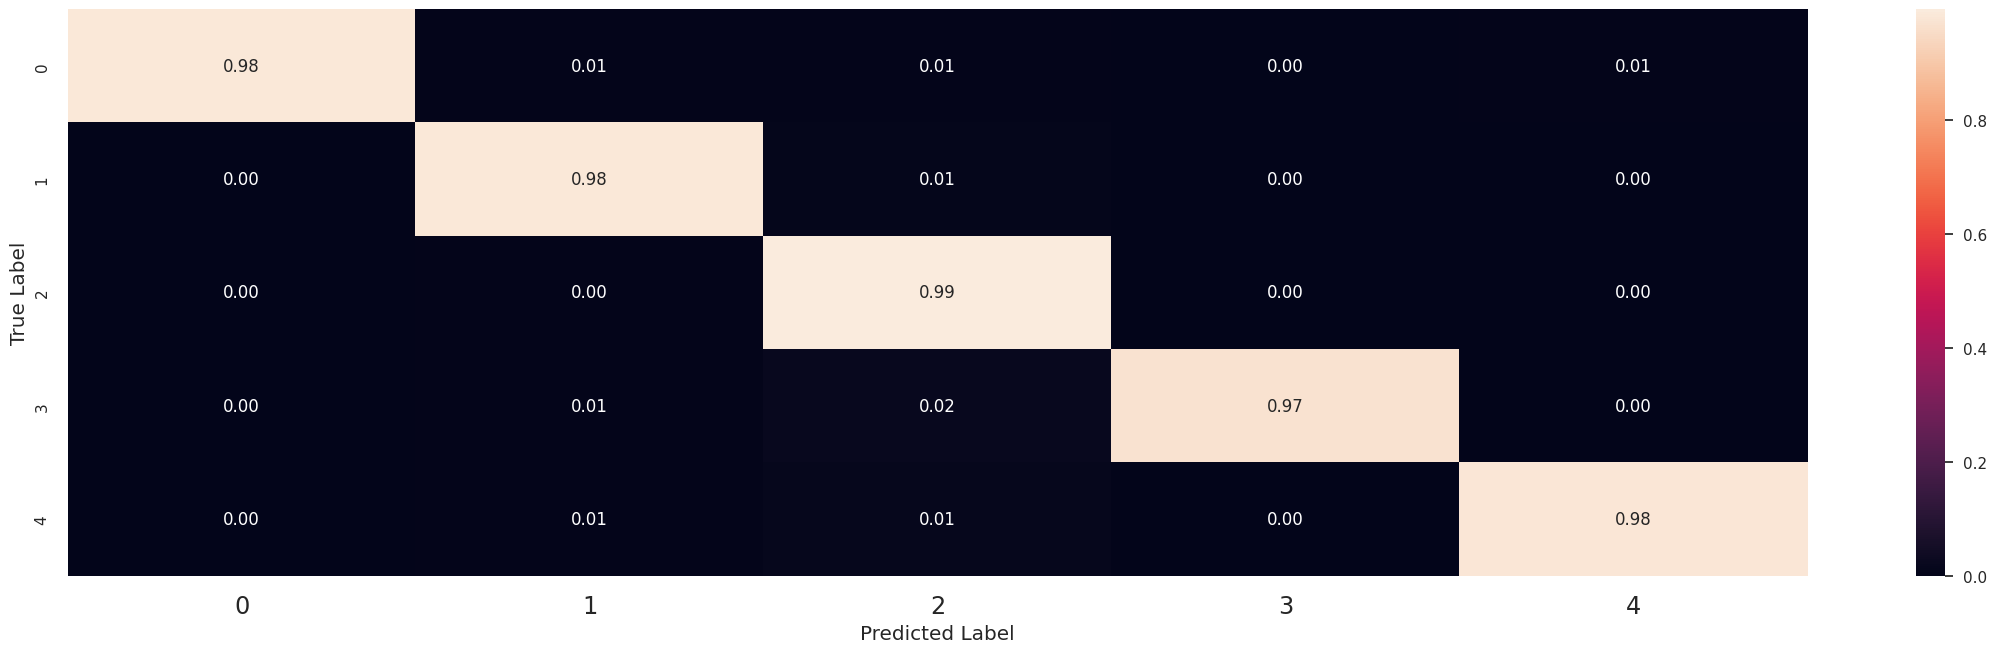

In [588]:
# normalising and viewing the confusion matrix
rf_conf_matrix_em_norm = rf_conf_matrix_em.astype('float') / rf_conf_matrix_em.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(rf_conf_matrix_em_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

### **Naive Bayes Classifier**

#### **Training**

In [589]:
# initializing and fitting the Multinomial Naive Bayes classifier
clf_mnb_em = MultinomialNB(alpha=0.001)
clf_mnb_em.fit(X_train_emotion_vector, y_train_emotion)

MultinomialNB(alpha=0.001)

#### **Evaluation**

In [590]:
# calculating mean accuracy for Multinomial Naive Bayes classifier
score_mnb_em=clf_mnb_em.score(X_test_emotion_vector, y_test_emotion)
clf_accuracy_emotion.append(score_mnb_em)
clf_name_emotion.append("Multinomial Naive Bayes")
print("Score for Multinomial Naive Bayes Classifier is:",score_mnb_em)

Score for Multinomial Naive Bayes Classifier is: 0.9785


In [591]:
# calculating the prediction
prediction_em_mnb = clf_mnb_em.predict(X_test_emotion_vector)

In [592]:
# calculating the metrics for prediction
mnb_em_metrics = metrics.classification_report(y_test_emotion,prediction_em_mnb,target_names=emotion_list)
print(mnb_em_metrics)

              precision    recall  f1-score   support

       Happy       0.97      0.98      0.98       192
       Angry       0.98      0.99      0.98      1308
    Surprise       0.98      0.96      0.97       998
         Sad       0.98      0.97      0.97       748
        Fear       0.98      0.98      0.98       754

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



In [593]:
# creating the confusion matrix
mnb_conf_matrix_em = confusion_matrix(y_test_emotion, prediction_em_mnb)
mnb_conf_matrix_em

array([[ 189,    1,    0,    2,    0],
       [   0, 1293,    5,    7,    3],
       [   4,   18,  963,    6,    7],
       [   1,   11,    6,  727,    3],
       [   0,    3,    6,    3,  742]])

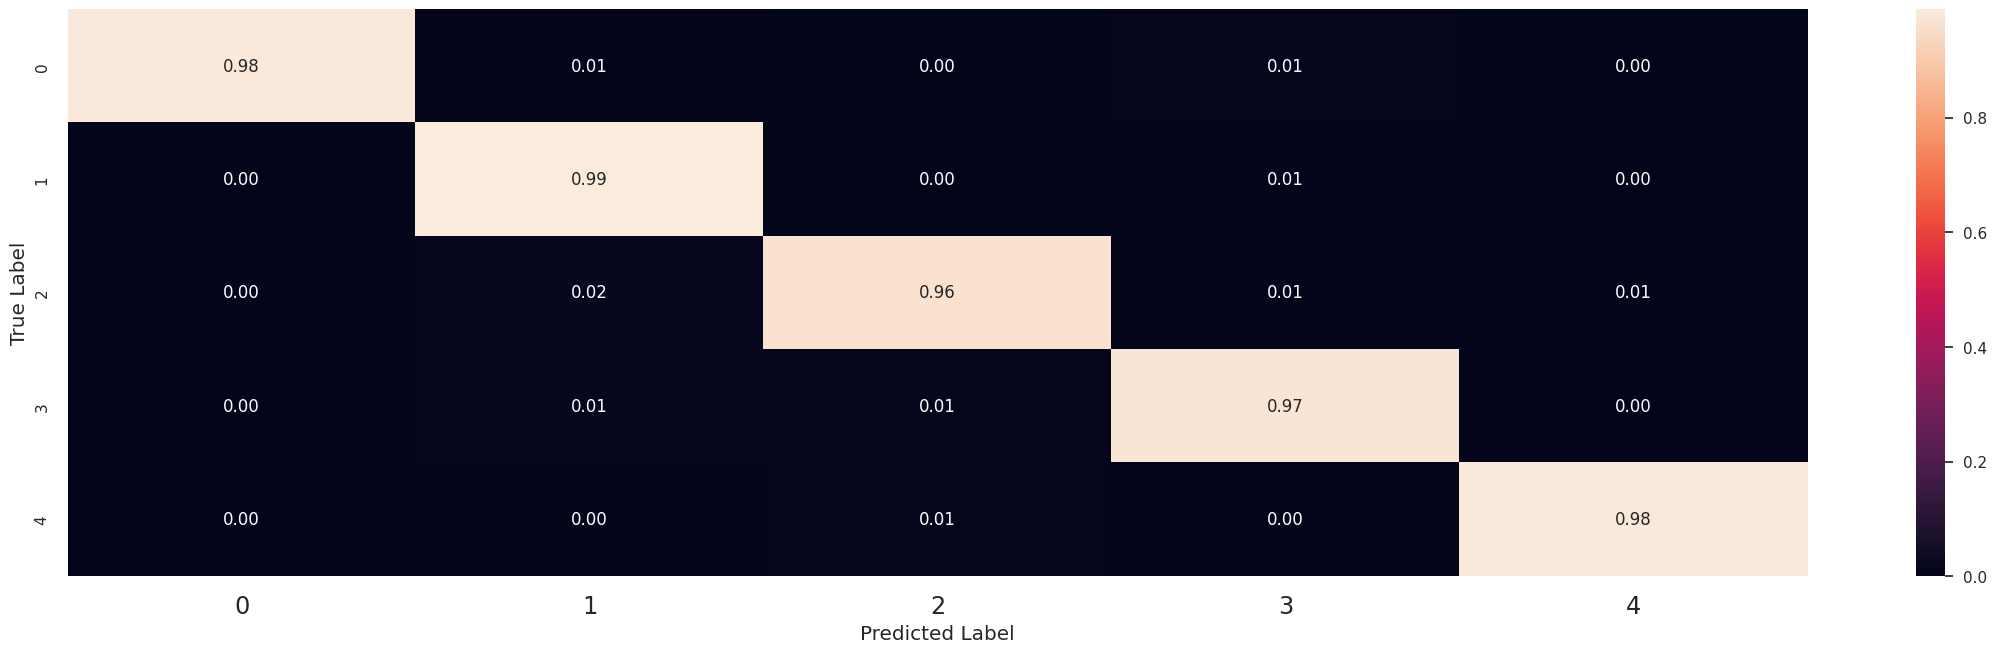

In [594]:
# normalising and viewing the confusion matrix
mnb_conf_matrix_em_norm = mnb_conf_matrix_em.astype('float') / mnb_conf_matrix_em.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(mnb_conf_matrix_em_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

### **Decision Tree Classifier**

#### **Training**

In [595]:
# initializing and fitting the Decision tree classifier
clf_dt_em = DecisionTreeClassifier(criterion="gini", splitter='random',min_samples_split=30)   
clf_dt_em.fit(X_train_emotion_vector, y_train_emotion)

DecisionTreeClassifier(min_samples_split=30, splitter='random')

#### **Evaluation**

In [596]:
# calculating mean accuracy for Decision Tree classifier
score_dt_em=clf_dt_em.score(X_test_emotion_vector, y_test_emotion)
clf_accuracy_emotion.append(score_dt_em)
clf_name_emotion.append("Decision Tree")
print("Score for Decision Tree Classifier is:",score_dt_em)

Score for Decision Tree Classifier is: 0.85175


In [597]:
# calculating the prediction
prediction_em_dt = clf_dt_em.predict(X_test_emotion_vector)

In [598]:
# calculating the metrics for prediction
dt_em_metrics = metrics.classification_report(y_test_emotion,prediction_em_dt,target_names=emotion_list)
print(dt_em_metrics)

              precision    recall  f1-score   support

       Happy       0.64      0.73      0.68       192
       Angry       0.86      0.88      0.87      1308
    Surprise       0.96      0.89      0.92       998
         Sad       0.80      0.82      0.81       748
        Fear       0.82      0.82      0.82       754

    accuracy                           0.85      4000
   macro avg       0.82      0.83      0.82      4000
weighted avg       0.86      0.85      0.85      4000



In [599]:
# creating the confusion matrix
dt_conf_matrix_em = confusion_matrix(y_test_emotion, prediction_em_dt)
dt_conf_matrix_em

array([[ 140,   22,    3,   11,   16],
       [  37, 1146,   16,   48,   61],
       [  13,   34,  890,   32,   29],
       [  10,   78,   15,  613,   32],
       [  18,   55,    5,   58,  618]])

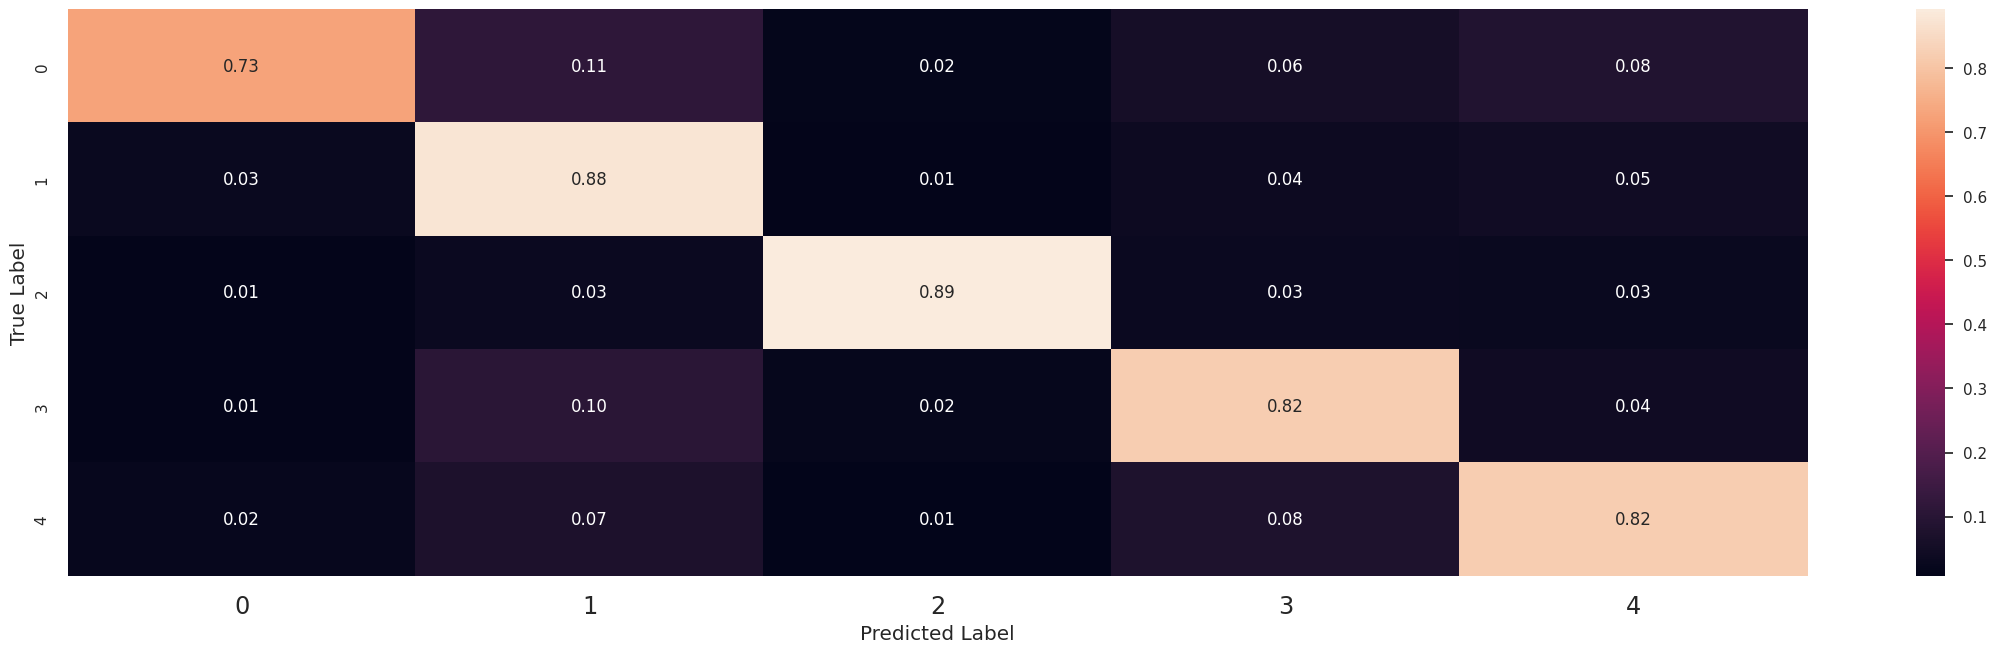

In [600]:
# normalising and viewing the confusion matrix
dt_conf_matrix_em_norm = dt_conf_matrix_em.astype('float') / dt_conf_matrix_em.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(dt_conf_matrix_em_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');

In [601]:
# preprocessing to plot the accuracies of above classifiers
clf_accuracy_emotion.sort()

## **Comparing Accuracies**

In [602]:
clf_name_emotion=['Decision Tree', 'Multinomial Naive Bayes', 'Random Forest']

In [603]:
all_model_acc_compare_emotion = pd.DataFrame({'Algorithm' : clf_name_emotion, 'Testing_Accuracy' : clf_accuracy_emotion})

In [604]:
# comparing training and testing accuracies : new
all_model_acc_compare_emotion.sort_values(by='Testing_Accuracy', ascending=False).style.hide_index()


Algorithm,Testing_Accuracy
Random Forest,0.983500
Multinomial Naive Bayes,0.978500
Decision Tree,0.851750


[Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Multinomial Naive Bayes'),
 Text(0, 0, 'Random Forest')]

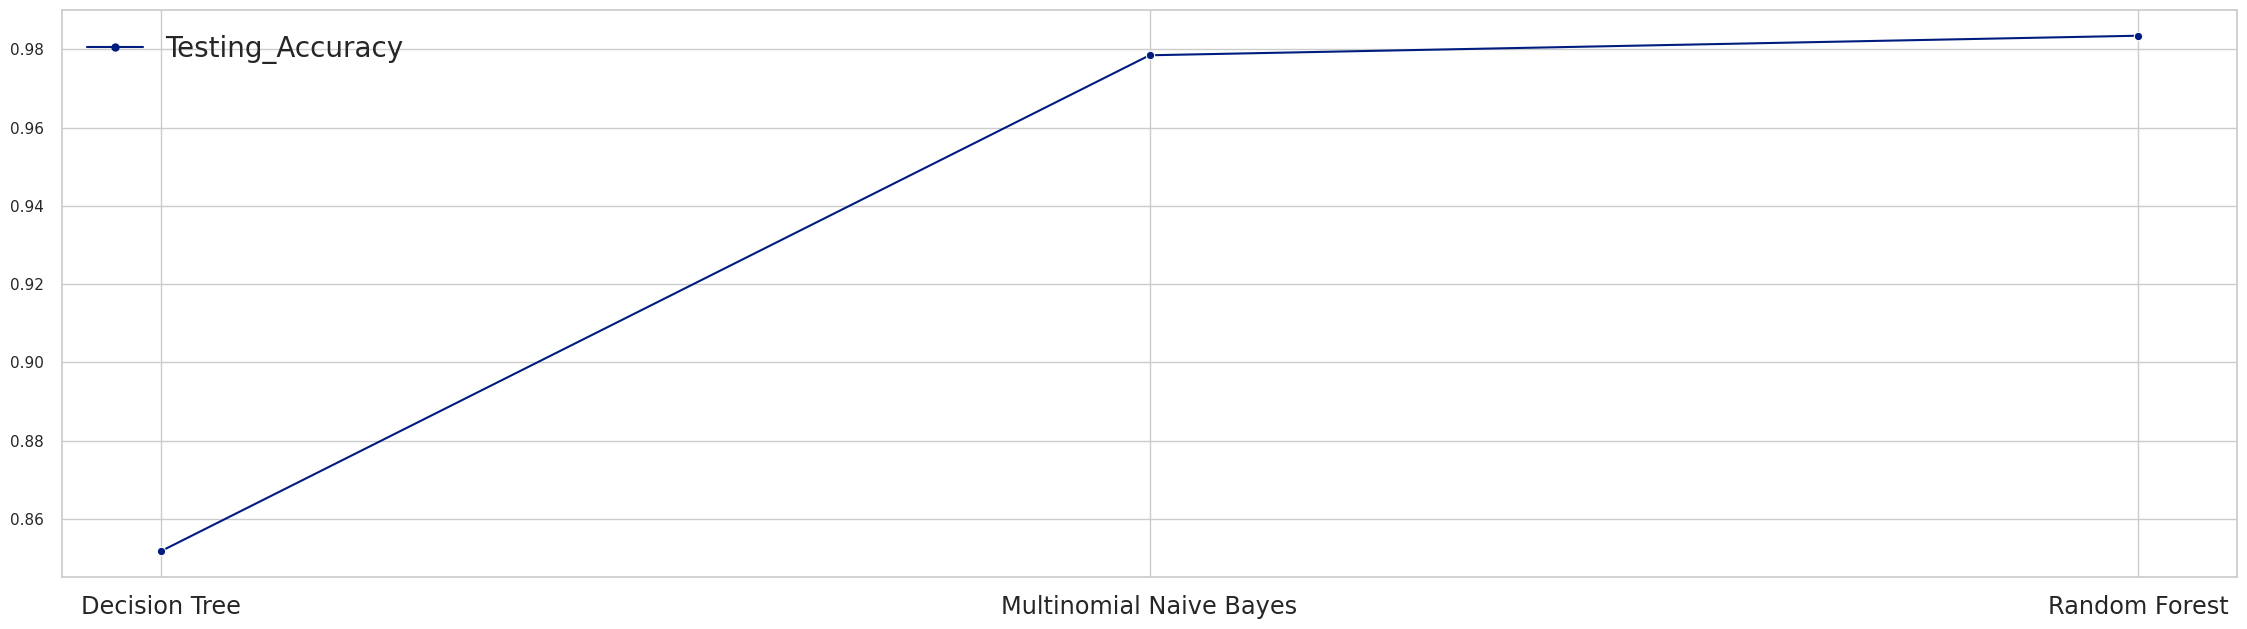

In [605]:
# visualizing the testing accuracies
ax_em=sns.lineplot(data=[all_model_acc_compare_emotion['Testing_Accuracy']],dashes=False,markers=True)
ax_em.set_xticks(range(len(all_model_acc_compare_emotion['Algorithm'])))
ax_em.set_xticklabels(all_model_acc_compare_emotion['Algorithm'])

**Plot Analysis:**

This plot illustrates the testing accuracy of all the models on which we tested our data. The decision tree classifier has the lowest accuracy while the Random Forest Classifier has the highest accuracy.

## **Comparing Metrics**

In [606]:
# calculating all the performance metrics
em_precision_score.extend([metrics.precision_score(y_test_emotion, prediction_em_dt,average="weighted")*100,
                           metrics.precision_score(y_test_emotion, prediction_em_mnb,average="weighted")*100,
                           metrics.precision_score(y_test_emotion, prediction_em_rf,average="weighted")*100])


em_recall_score.extend([metrics.recall_score(y_test_emotion, prediction_em_dt,average="weighted")*100,
                           metrics.recall_score(y_test_emotion, prediction_em_mnb,average="weighted")*100,
                           metrics.recall_score(y_test_emotion, prediction_em_rf,average="weighted")*100])

em_f1_score.extend([metrics.f1_score(y_test_emotion, prediction_em_dt,average="weighted")*100,
                           metrics.f1_score(y_test_emotion, prediction_em_mnb,average="weighted")*100,
                           metrics.f1_score(y_test_emotion, prediction_em_rf,average="weighted")*100])

In [607]:
# displaying all the performance metrics
em_metric = pd.DataFrame({'Model' : ['Decision tree', 'Multinomial Naive Bayes', 'Random Forest'],
                       'Precision' : em_precision_score,
                       'Recall' : em_recall_score,
                       'F1' : em_f1_score,
                       'Test_Accuracy' : clf_accuracy_emotion},
                       index=[0,1,2])

em_metric.sort_values(by='Test_Accuracy', ascending=True, inplace=True)
em_metric

,Model,Precision,Recall,F1,Test_Accuracy
0,Decision tree,85.508279,85.175,85.294525,0.85175
1,Multinomial Naive Bayes,97.853300,97.850,97.847931,0.97850
2,Random Forest,98.378465,98.350,98.353219,0.98350


From the above accuracy table, It can be illustrated that,

1. The random forest classifier can predict the correct emotion over 98.6% of times. This is a great accuracy for a classifier.
Also, the precision and recall is 97%, which indicates, over 97% of the **total**(Precision) positive predictions and 97% of the **acutal** positive(Recall) predictions about the emotions are correct.

2. The multinomial naive bayes classifier has the accuracy of 97.7%, it means it can predict 97/100 times, the correct emotion.

3. The decision tree classifier has the lowest accuracy among all.

## **Popularity of Emotions vs time**

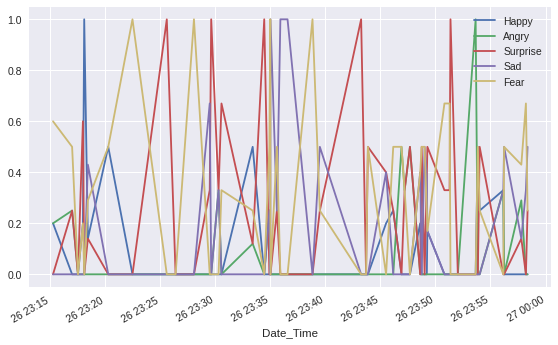

In [ ]:
# Analyzing the popularity of the different emotion labels which are predicted for each and every text with respect to the timeframe
emotion_data.head(50).plot(x="Date_Time", y=["Happy", "Angry","Surprise","Sad","Fear"], kind="line")
plt.show()